# Apriori Algorithm 

This notebook demonstrates the use of the Apriori algorithm to generate association rules between the frequent aisles from a transaction dataset.

## Steps

1. **Import Libraries**: Import the necessary libraries for data manipulation and the Apriori algorithm.
2. **Load Dataset**: Load the transaction dataset into a pandas DataFrame.
3. **Generate Frequent Item sets**: Use the `apriori` function to generate frequent item sets with a minimum support threshold.
4. **Generate Association Rules**: Use the `association_rules` function to generate association rules from the frequent item sets, using lift as the metric.
5. **Sort Rules**: Sort the generated rules by the lift metric in ascending order.
6. **Display Rules**: Display the sorted rules.

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

root = 'C:/Users/cabre/PycharmProjects/Market-Basket-Analysis/Data/'

In [2]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')


In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [6]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
order_products = order_products_prior.merge(products, on ='product_id', how='left')
order_products = order_products.merge(aisles, on ='aisle_id', how='left')
order_products = order_products.merge(departments, on ='department_id', how='left')
order_products = order_products.merge(orders, on='order_id', how='left')
order_products.shape

(32434489, 15)

In [10]:
aisles_counts = order_products.groupby('aisle_id')['order_id'].count().reset_index().rename(columns = {'order_id':'frequency'})
aisles_counts = aisles_counts.sort_values('frequency', ascending=False).reset_index(drop = True)
aisles_counts

,aisle_id,frequency
0,24,3642188
1,83,3418021
2,123,1765313
3,120,1452343
4,21,979763
...,...,...
129,44,8974
130,102,8581
131,82,8160
132,132,6168


In [11]:
transactions_list = order_products.groupby('order_id')['aisle'].apply(list).tolist()
len(transactions_list)

3214874

## Transforms the transactions_list into a one-hot encoded NumPy boolean

In [12]:
transaction_encoder = TransactionEncoder()
transaction_array = transaction_encoder.fit(transactions_list).transform(transactions_list)
transaction_df = pd.DataFrame(transaction_array, columns=transaction_encoder.columns_)
transaction_df

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3214869,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3214870,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3214871,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3214872,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Generate frequent aisles using the Apriori algorithm

In [13]:
frequent_aisles = apriori(transaction_df, min_support=0.01, use_colnames=True, low_memory=True)
frequent_aisles.head()

,support,itemsets
0,0.043074,(asian foods)
1,0.046157,(baby food formula)
2,0.010239,(bakery desserts)
3,0.076754,(baking ingredients)
4,0.011051,(body lotions soap)


## Association rules between the frequent aisles

In [14]:
rules = association_rules(frequent_aisles, metric="lift", min_threshold=1)
rules.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
12563,"(fresh fruits, dry pasta)","(pasta sauce, fresh vegetables)",0.048427,0.040542,0.010046,0.207450,5.116844,1.0,0.008083,1.210595,0.845512,0.127290,0.173960,0.227621
12558,"(pasta sauce, fresh vegetables)","(fresh fruits, dry pasta)",0.040542,0.048427,0.010046,0.247792,5.116844,1.0,0.008083,1.265041,0.838565,0.127290,0.209511,0.227621
12562,"(fresh vegetables, dry pasta)","(pasta sauce, fresh fruits)",0.047496,0.042237,0.010046,0.211515,5.007825,1.0,0.008040,1.214687,0.840220,0.126070,0.176743,0.224683
12559,"(pasta sauce, fresh fruits)","(fresh vegetables, dry pasta)",0.042237,0.047496,0.010046,0.237852,5.007825,1.0,0.008040,1.249763,0.835606,0.126070,0.199848,0.224683
10351,"(fresh fruits, canned jarred vegetables)","(canned meals beans, fresh vegetables)",0.049669,0.049893,0.011693,0.235415,4.718410,1.0,0.009215,1.242644,0.829252,0.133071,0.195264,0.234887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,(candy chocolate),"(fresh vegetables, fresh fruits)",0.069540,0.317762,0.022144,0.318434,1.002115,1.0,0.000047,1.000986,0.002268,0.060642,0.000985,0.194060
1386,(milk),(water seltzer sparkling water),0.244485,0.191012,0.046774,0.191316,1.001590,1.0,0.000074,1.000376,0.002101,0.120327,0.000375,0.218095
1387,(water seltzer sparkling water),(milk),0.191012,0.244485,0.046774,0.244873,1.001590,1.0,0.000074,1.000515,0.001962,0.120327,0.000514,0.218095
6405,(packaged produce),"(fresh fruits, milk)",0.062011,0.164421,0.010207,0.164600,1.001088,1.0,0.000011,1.000214,0.001159,0.047205,0.000214,0.113339


In [15]:
aisles_counts.merge(aisles, on='aisle_id', how='left').sort_values('frequency', ascending=False)

,aisle_id,frequency,aisle
0,24,3642188,fresh fruits
1,83,3418021,fresh vegetables
2,123,1765313,packaged vegetables fruits
3,120,1452343,yogurt
4,21,979763,packaged cheese
...,...,...,...
129,44,8974,eye ear care
130,102,8581,baby bath body care
131,82,8160,baby accessories
132,132,6168,beauty


In [16]:
# Primero obtenemos los nombres de los pasillos más y menos vendidos
top_aisle_names = ["fresh fruits",
    "fresh vegetables",
    "packaged vegetables fruits",
    "yogurt",
    "packaged cheese"]
less_aisle_names = ["canned fruit applesauce",
    "specialty cheeses",
    "latino foods",
    "frozen meat seafood",
    "breakfast bars pastries",
    "prepared soups salads",
    "meat counter",
    "canned meat seafood",
    "honeys syrups nectars",
    "marinades meat preparation",
    "beers coolers",
    "frozen breads doughs",
    "refrigerated pudding desserts",
    "fresh pasta",
    "protein meal replacements",
    "trail mix snack mix",
    "red wines",
    "bakery desserts",
    "packaged meat",
    "white wines",
    "seafood counter",
    "spirits",
    "baking supplies decor",
    "mint gum",
    "cocoa drink mixes",
    "packaged seafood",
    "frozen dessert",
    "bulk dried fruits vegetables",
    "bulk grains rice dried goods",
    "indian foods",
    "ice cream toppings",
    "kitchen supplies",
    "frozen juice"]

# Función para verificar si un conjunto (frozenset) contiene al menos un elemento de una lista
def contains_any(frozenset_item, target_list):
    return any(item in target_list for item in frozenset_item)

# Filtrar reglas: si antecedent tiene un top, consequent debe tener un less
top_to_less_rules = rules[
    # Antecedent contiene al menos un pasillo top
    rules['antecedents'].apply(lambda x: contains_any(x, top_aisle_names)) &
    # Consequent contiene al menos un pasillo less
    rules['consequents'].apply(lambda x: contains_any(x, less_aisle_names))
]

# Filtrar reglas: si antecedent tiene un less, consequent debe tener un top
less_to_top_rules = rules[
    # Antecedent contiene al menos un pasillo less
    rules['antecedents'].apply(lambda x: contains_any(x, less_aisle_names)) &
    # Consequent contiene al menos un pasillo top
    rules['consequents'].apply(lambda x: contains_any(x, top_aisle_names))
]

# Combinar ambos conjuntos de reglas
filtered_rules = pd.concat([top_to_less_rules, less_to_top_rules]).drop_duplicates()

# Ordenar por lift en orden descendente
filtered_rules = filtered_rules.sort_values('lift', ascending=False)

# Ver resultados
print(f"Total de reglas originales: {len(rules)}")
print(f"Reglas de pasillos top a pasillos less: {len(top_to_less_rules)}")
print(f"Reglas de pasillos less a pasillos top: {len(less_to_top_rules)}")
print(f"Total de reglas filtradas combinadas: {len(filtered_rules)}")


Total de reglas originales: 22082
Reglas de pasillos top a pasillos less: 35
Reglas de pasillos less a pasillos top: 35
Total de reglas filtradas combinadas: 70


In [17]:
import networkx as nx
import matplotlib.pyplot as plt

def crear_grafo_reglas(rules):
    # Crear un grafo dirigido
    G = nx.DiGraph()
    
    # Añadir nodos y aristas
    for i, row in rules.iterrows():
        antecedente = ', '.join(list(row['antecedents']))
        consecuente = ', '.join(list(row['consequents']))
        
        # Añadir nodos si no existen
        if not G.has_node(antecedente):
            G.add_node(antecedente)
        if not G.has_node(consecuente):
            G.add_node(consecuente)
        
        # Añadir arista con atributos (lift, confidence, etc.)
        G.add_edge(antecedente, consecuente, 
                   weight=row['lift'],
                   confidence=row['confidence'],
                   support=row['support'])
    
    return G


def mostrar_reglas_importantes(rules, top_n=10):
    print(f"Top {top_n} reglas por lift:")
    print(rules.sort_values('lift', ascending=False).head(top_n)[['antecedents', 'consequents', 'lift', 'confidence']])


def crear_grafo_top_reglas(rules, top_n=20):
    """Crear grafo solo con top N reglas para evitar saturación"""
    top_rules = rules.sort_values('lift', ascending=False).head(top_n)
    return crear_grafo_reglas(top_rules)


def visualizar_grafo_grayscale(G):
    """Versión en escala de grises para IEEE (más económica)"""
    fig_width = 7.16
    fig_height = 5.5
    
    plt.figure(figsize=(fig_width, fig_height), dpi=300)
    plt.style.use('default')
    
    pos = nx.spring_layout(G, k=2.5, iterations=100, seed=42)
    
    lifts = [G[u][v]['weight'] for u, v in G.edges()]
    
    max_width = 3
    if len(lifts) > 1 and max(lifts) != min(lifts):
        edge_widths = [0.8 + (lift - min(lifts)) / (max(lifts) - min(lifts)) * max_width for lift in lifts]
    else:
        edge_widths = [1.5] * len(lifts)
    
    # Escala de grises
    nx.draw_networkx_nodes(G, pos, node_size=1800, node_color='lightgray', 
                          edgecolors='black', linewidths=2, alpha=0.9)
    
    if lifts:
        # Diferentes tonos de gris según el lift
        if len(set(lifts)) > 1:
            normalized_lifts = [(lift - min(lifts)) / (max(lifts) - min(lifts)) for lift in lifts]
            edge_colors = [0.8 - 0.6 * norm_lift for norm_lift in normalized_lifts]  # 0.2 a 0.8 (oscuro a claro)
        else:
            edge_colors = [0.4] * len(lifts)
            
        edges = nx.draw_networkx_edges(G, pos, width=edge_widths, 
                                     edge_color=edge_colors, edge_cmap=plt.cm.gray,
                                     arrowsize=15, alpha=0.8, connectionstyle="arc3,rad=0.05")
    
    labels = {}
    for node in G.nodes():
        if len(node) > 12:
            labels[node] = node[:9] + "..."
        else:
            labels[node] = node
    
    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_family='serif', 
                           font_color='black', font_weight='normal')
    
    plt.axis('off')
    plt.tight_layout()
    
    plt.savefig("association_rules_graph_grayscale.png", format='png', dpi=300, bbox_inches='tight', 
                facecolor='white', edgecolor='none')
    plt.show()


In [18]:
filtered_rules = filtered_rules[filtered_rules['lift'] > 1.3 ]
filtered_rules = filtered_rules[filtered_rules['confidence'] > 0.1]

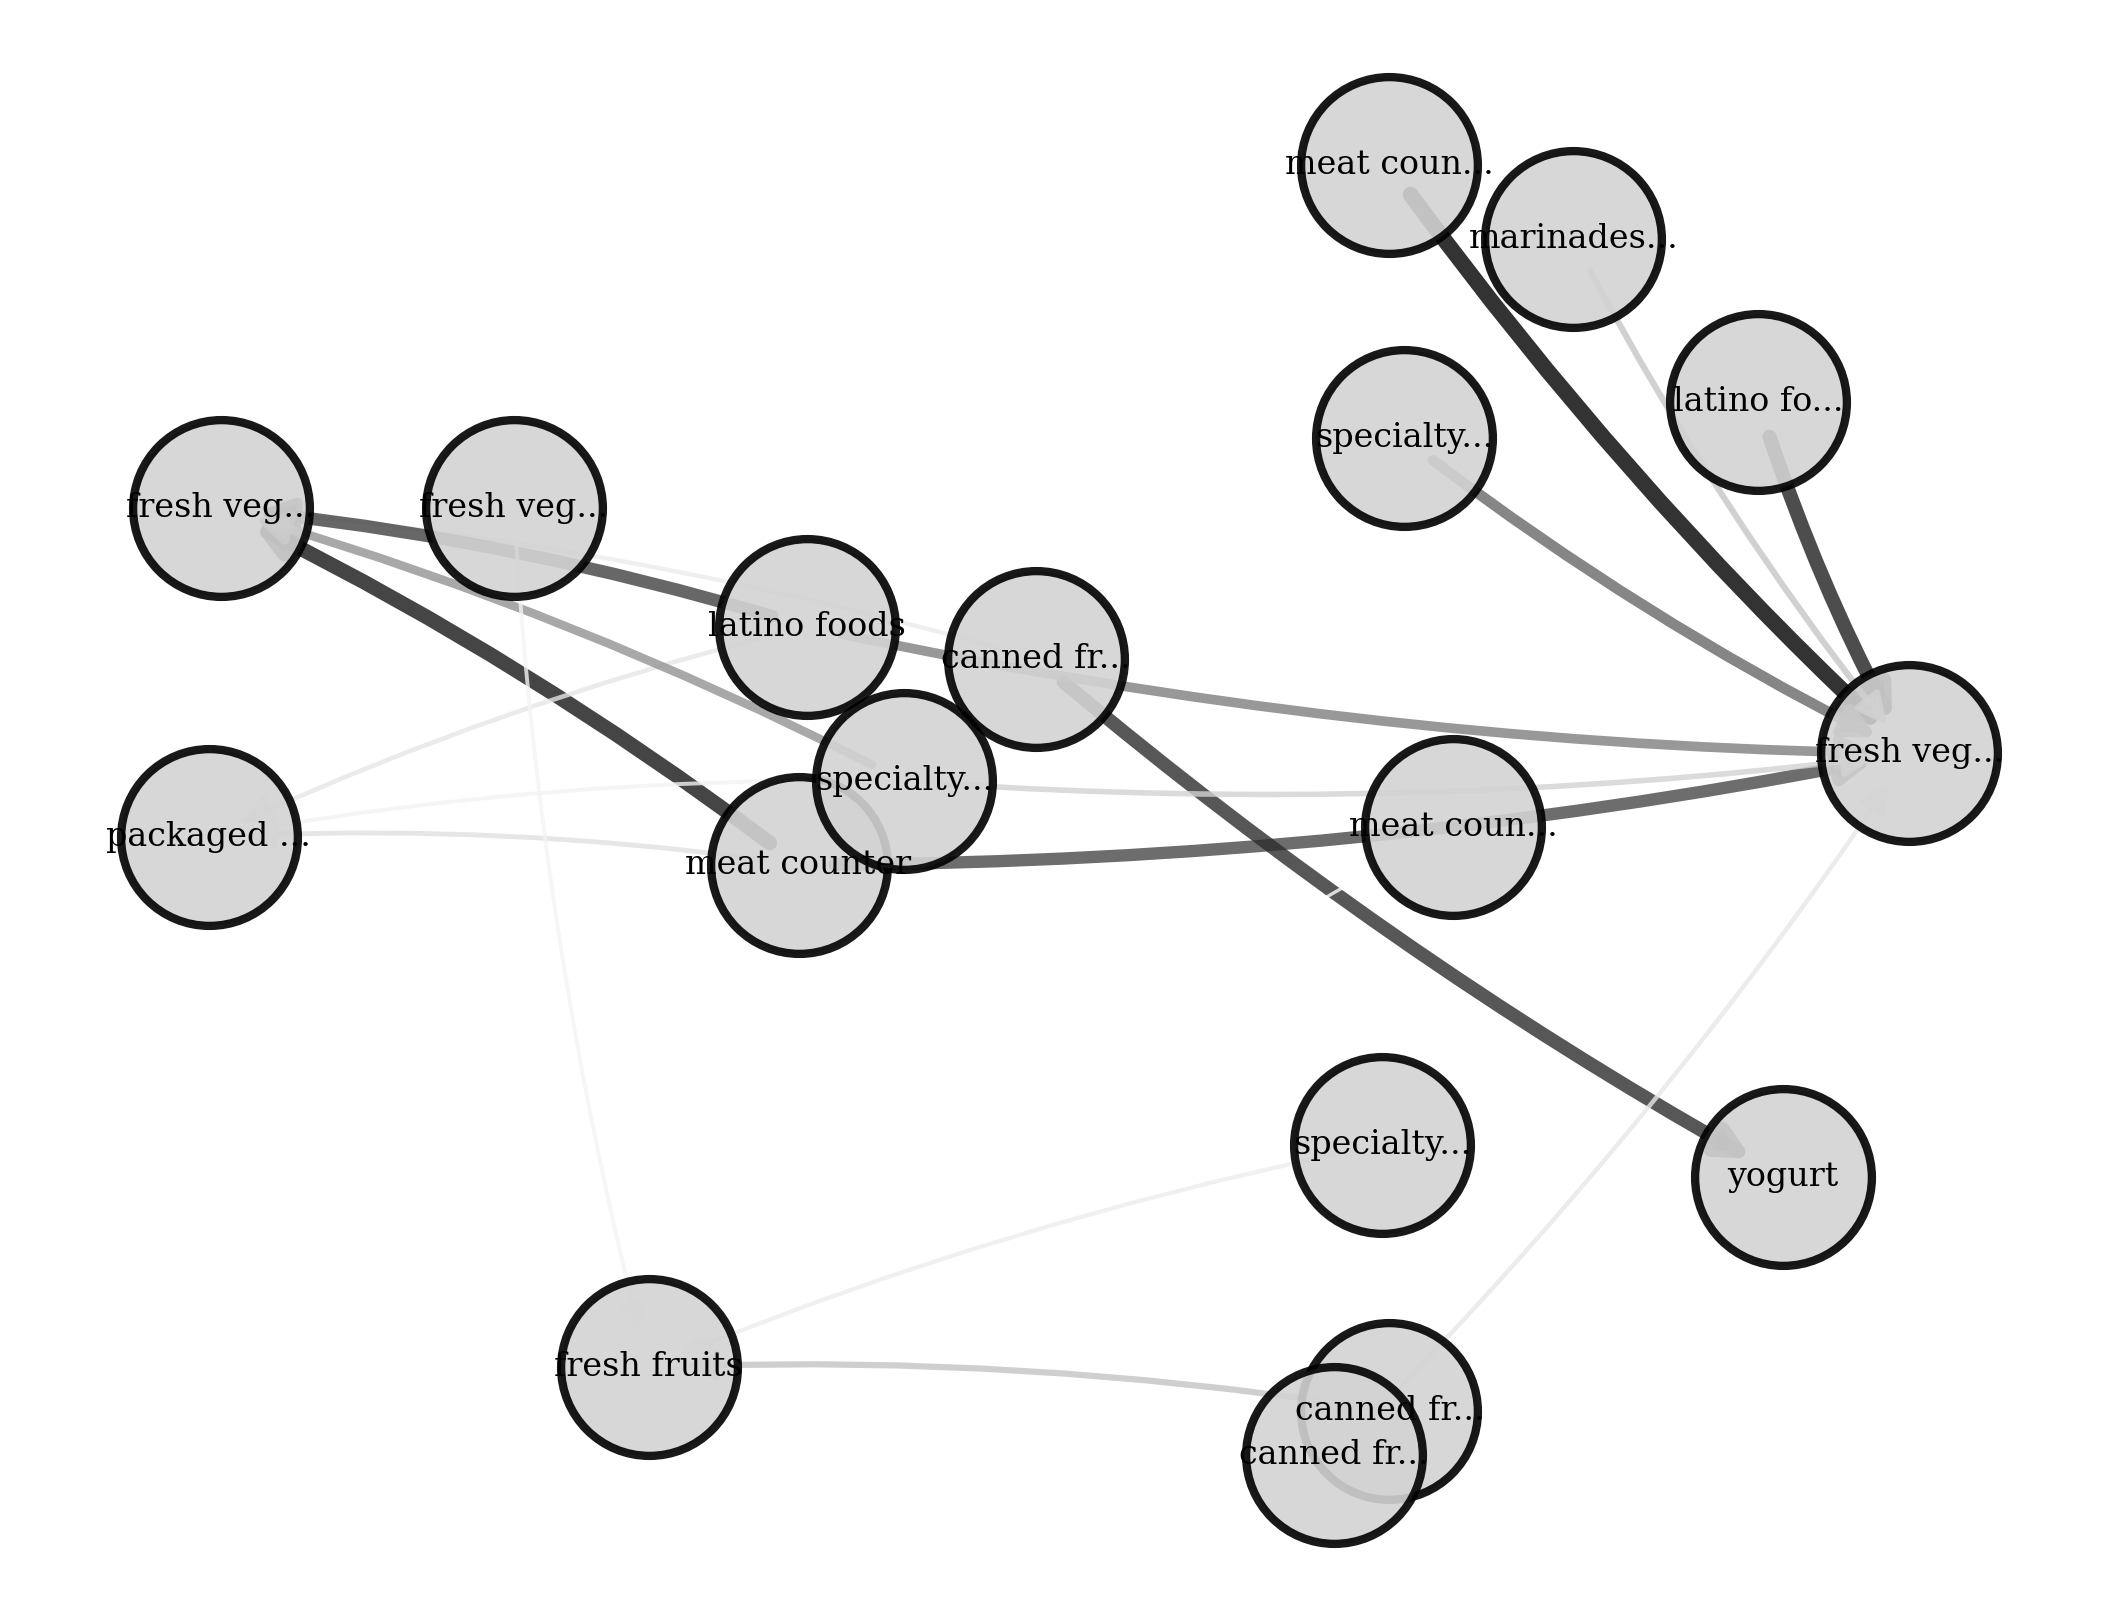

In [40]:
G_top = crear_grafo_top_reglas(filtered_rules)
visualizar_grafo_grayscale(G_top) 

# Clusters

In [20]:
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

from sklearn.decomposition import PCA

with open(root + "/vecindarios.pkl", "rb") as f:
    vecindarios = pickle.load(f)
print("Vecindarios:", vecindarios)

Vecindarios: [{'canned fruit applesauce', 'canned meat seafood', 'yogurt', 'packaged vegetables fruits', 'fresh fruits', 'marinades meat preparation', 'latino foods', 'specialty cheeses', 'fresh vegetables', 'packaged cheese', 'meat counter'}]


In [21]:
order_products.user_id.nunique()

206209

In [22]:
cross_df = pd.crosstab(order_products.user_id, order_products.aisle)
cross_df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [23]:
df = cross_df.div(cross_df.sum(axis=1), axis=0)
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.016949,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.016949
2,0.0,0.015385,0.0,0.0,0.0,0.0,0.010256,0.0,0.0,0.0,...,0.015385,0.005128,0.005128,0.000000,0.0,0.0,0.0,0.010256,0.0,0.215385
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.045455,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000
5,0.0,0.054054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.081081


In [24]:
pca = PCA(n_components=10)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.113443,0.039084,-0.042863,0.018865,-0.088337,-0.104517,-0.116488,0.083662,-0.062759,-0.025136
1,-0.036988,0.108884,-0.066406,-0.123271,0.098851,-0.033949,-0.054756,-0.053372,-0.020283,-0.008006
2,0.064282,0.103962,0.000710,-0.012220,-0.046981,0.112257,-0.029858,0.007855,0.012316,0.001841
3,-0.093210,0.054093,0.001867,-0.003973,-0.071356,-0.019288,-0.025119,-0.038224,0.006532,-0.001039
4,0.094629,-0.037051,-0.024952,-0.021575,0.055372,0.107653,-0.008029,0.103923,0.051927,-0.025417


In [25]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    Sum_of_squared_distances.append(km.inertia_)

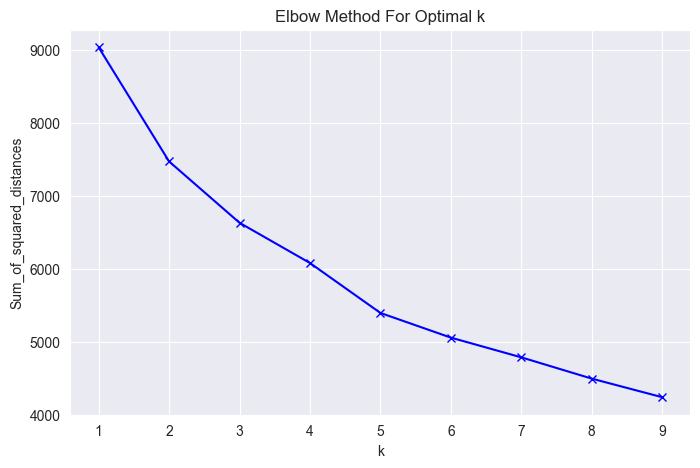

In [26]:
plt.subplots(figsize = (8, 5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
clusterer = KMeans(n_clusters=5,random_state=42).fit(df_pca)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(df_pca)
centers

array([[ 1.05973608e-01, -7.37878215e-02,  1.74306002e-02,
         3.86048097e-03,  1.75770430e-03, -4.60297751e-03,
        -9.50990304e-04,  1.24551649e-03, -1.48254459e-04,
         8.16835505e-04],
       [ 6.63077855e-02,  1.03497311e-01, -1.51202157e-03,
        -3.09229560e-02, -1.00812500e-02,  7.51857891e-03,
        -5.69428714e-04,  4.56857344e-03, -7.78569279e-04,
        -1.69656515e-04],
       [-5.73110448e-03,  1.31330589e-01,  4.93733670e-03,
         2.29961706e-01,  1.09973953e-01, -2.29229402e-02,
         4.13299242e-05, -6.44184519e-03,  7.83115511e-03,
         3.03545758e-03],
       [-7.44090859e-02, -1.09655975e-02, -2.68997839e-02,
        -6.80521980e-03, -6.89945573e-03,  1.42966084e-03,
         5.30202562e-04, -2.58358919e-03, -2.99407126e-04,
        -4.23215278e-04],
       [-1.99077205e-01,  1.61988172e-02,  3.19564894e-01,
        -3.15369305e-02,  1.87804748e-02,  6.15279084e-04,
         4.15272401e-03,  1.10687144e-02,  1.06978934e-03,
        -3.

In [28]:
temp_df = df_pca.iloc[:, 0:2]
temp_df.columns = ["pc1", "pc2"]
temp_df['cluster'] = c_preds
temp_df.head()

C:\Users\cabre\AppData\Local\Temp\ipykernel_1804\4221584760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cluster'] = c_preds


,pc1,pc2,cluster
0,-0.113443,0.039084,3
1,-0.036988,0.108884,1
2,0.064282,0.103962,1
3,-0.093210,0.054093,3
4,0.094629,-0.037051,0


C:\Users\cabre\AppData\Local\Temp\ipykernel_1804\2605288517.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['cluster_name'] = temp_df['cluster'].map(cluster_names)
C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\User

Distribución de clusters:
Compradores Balanceados: 98679 usuarios (47.9%)
Vegetarianos/Veganos: 55407 usuarios (26.9%)
Amantes de las Frutas: 38817 usuarios (18.8%)
Compradores Prácticos: 7956 usuarios (3.9%)
Compradores de Bebidas: 5350 usuarios (2.6%)

Primeras filas del DataFrame:
        pc1       pc2  cluster             cluster_name
0 -0.113443  0.039084        3  Compradores Balanceados
1 -0.036988  0.108884        1    Amantes de las Frutas
2  0.064282  0.103962        1    Amantes de las Frutas
3 -0.093210  0.054093        3  Compradores Balanceados
4  0.094629 -0.037051        0     Vegetarianos/Veganos


C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

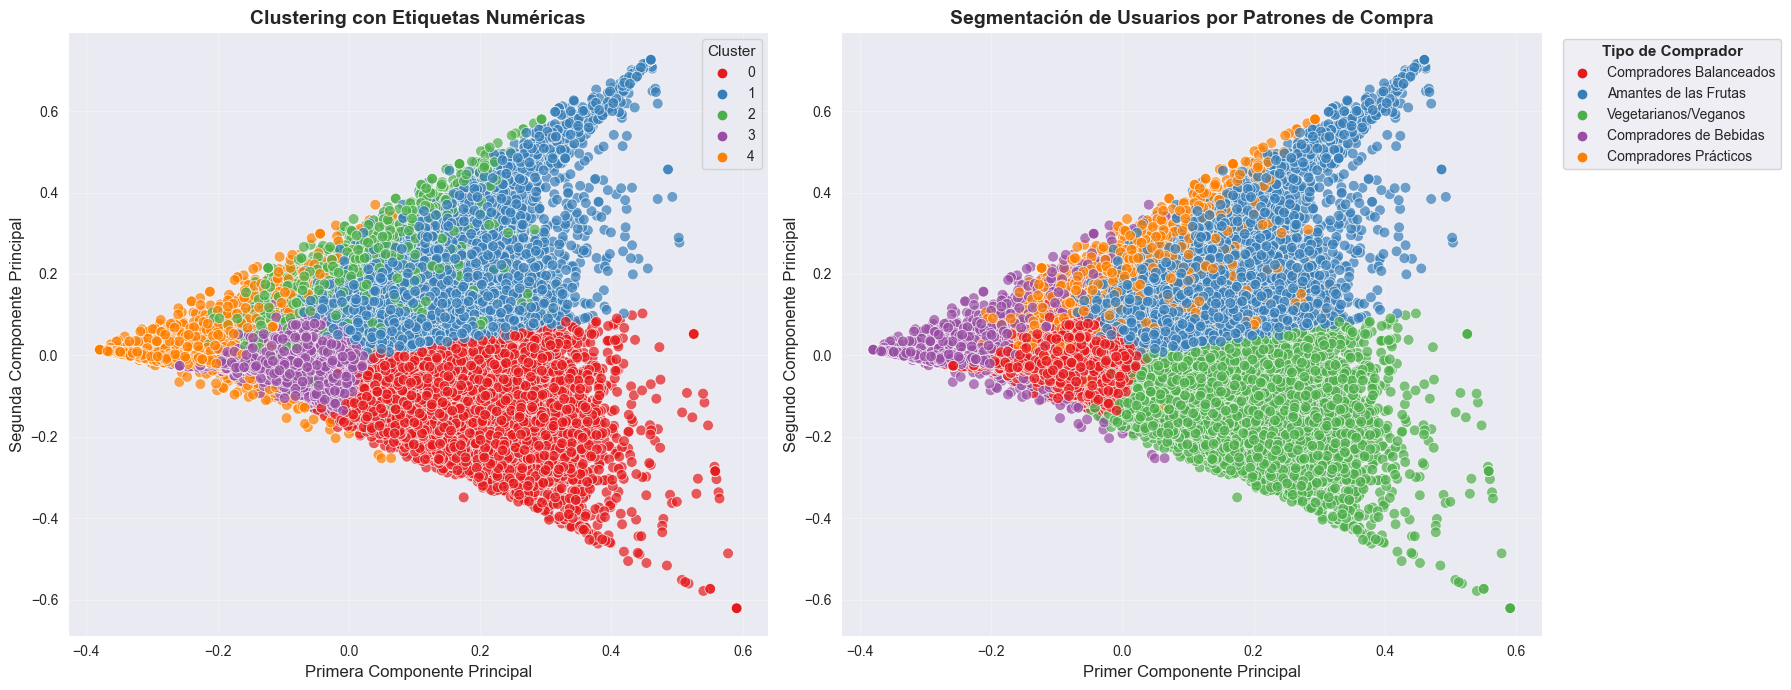

C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\cabre\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

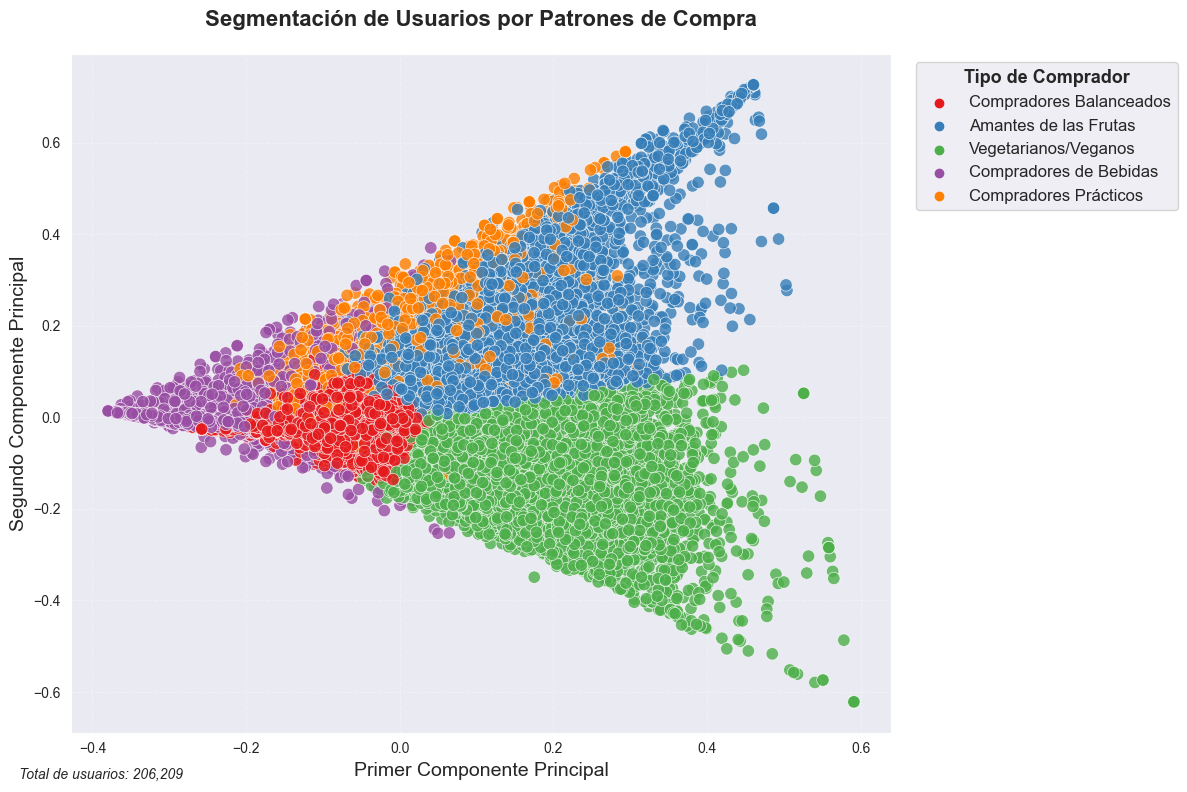

In [29]:
# Mapeo de clusters a nombres descriptivos
cluster_names = {
    0: "Vegetarianos/Veganos",
    1: "Amantes de las Frutas",
    2: "Compradores Prácticos",
    3: "Compradores Balanceados",
    4: "Compradores de Bebidas"
}

# Agregar columna con nombres descriptivos
temp_df['cluster_name'] = temp_df['cluster'].map(cluster_names)

print("Distribución de clusters:")
cluster_counts = temp_df['cluster_name'].value_counts()
for name, count in cluster_counts.items():
    percentage = (count / len(temp_df)) * 100
    print(f"{name}: {count} usuarios ({percentage:.1f}%)")

print("\nPrimeras filas del DataFrame:")
print(temp_df.head())

# Crear visualización mejorada con nombres descriptivos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

scatter1 = sns.scatterplot(data=temp_df, x="pc1", y="pc2", hue="cluster",
                           palette="Set1", s=60, alpha=0.7, ax=ax1)
ax1.set_xlabel("Primera Componente Principal", fontsize=12)
ax1.set_ylabel("Segunda Componente Principal", fontsize=12)
ax1.set_title("Clustering con Etiquetas Numéricas", fontsize=14,
              fontweight='bold')
ax1.legend(title="Cluster", title_fontsize=11, fontsize=10)
ax1.grid(True, alpha=0.3)

scatter2 = sns.scatterplot(data=temp_df, x="pc1", y="pc2", hue="cluster_name",
                           palette="Set1", s=60, alpha=0.7, ax=ax2)
ax2.set_xlabel("Primer Componente Principal", fontsize=12)
ax2.set_ylabel("Segundo Componente Principal", fontsize=12)
ax2.set_title("Segmentación de Usuarios por Patrones de Compra", fontsize=14,
              fontweight='bold')

legend = ax2.legend(title="Tipo de Comprador", title_fontsize=11, fontsize=10,
                    bbox_to_anchor=(1.02, 1), loc='upper left')
legend.get_title().set_fontweight('bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("cluster_visualization_improved.png", dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=temp_df, x="pc1", y="pc2", hue="cluster_name",
                          palette="Set1", s=80, alpha=0.8, edgecolor='white',
                          linewidth=0.5)

plt.xlabel("Primer Componente Principal", fontsize=14)
plt.ylabel("Segundo Componente Principal", fontsize=14)
plt.title("Segmentación de Usuarios por Patrones de Compra", fontsize=16,
          fontweight='bold', pad=20)

legend = plt.legend(title="Tipo de Comprador", title_fontsize=13, fontsize=12,
                    bbox_to_anchor=(1.02, 1), loc='upper left')
legend.get_title().set_fontweight('bold')

plt.grid(True, alpha=0.3, linestyle='--')

total_users = len(temp_df)
plt.figtext(0.02, 0.02, f'Total de usuarios: {total_users:,}', fontsize=10,
            style='italic')

plt.tight_layout()
plt.savefig("cluster_segmentation_final.png", dpi=300, bbox_inches='tight')
plt.show()

In [30]:
print("Los usuarios se han segmentado en 5 grupos distintos:")
cluster_summary = temp_df.groupby(['cluster', 'cluster_name']).size().reset_index(name='count')
cluster_summary['percentage'] = (cluster_summary['count'] / len(temp_df) * 100).round(1)

for _, row in cluster_summary.iterrows():
    print(
        f"• {row['cluster_name']}: {row['count']} usuarios ({row['percentage']}%)")

Los usuarios se han segmentado en 5 grupos distintos:
• Vegetarianos/Veganos: 55407 usuarios (26.9%)
• Amantes de las Frutas: 38817 usuarios (18.8%)
• Compradores Prácticos: 7956 usuarios (3.9%)
• Compradores Balanceados: 98679 usuarios (47.9%)
• Compradores de Bebidas: 5350 usuarios (2.6%)


# Top Aisles per Cluster

In [31]:
cross_df['cluster'] = c_preds

cluster1 = cross_df[cross_df.cluster == 0]
cluster2 = cross_df[cross_df.cluster == 1]
cluster3 = cross_df[cross_df.cluster == 2]
cluster4 = cross_df[cross_df.cluster == 3]
cluster5 = cross_df[cross_df.cluster == 4]

In [32]:
cluster1.drop('cluster',axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 37.084448
fresh fruits                     21.657101
packaged vegetables fruits       11.983360
yogurt                            6.119028
packaged cheese                   4.994477
fresh herbs                       4.157345
milk                              3.977602
soy lactosefree                   3.697042
frozen produce                    3.293501
water seltzer sparkling water     3.071435
dtype: float64

In [33]:
cluster2.drop('cluster',axis=1).mean().sort_values(ascending=False)[:10]

aisle
fresh fruits                     35.677332
fresh vegetables                 15.199758
packaged vegetables fruits       12.193987
yogurt                           10.016900
milk                              6.002885
packaged cheese                   5.185898
soy lactosefree                   3.797537
water seltzer sparkling water     3.640596
bread                             3.228225
chips pretzels                    3.161862
dtype: float64

In [34]:
cluster3.drop('cluster',axis=1).mean().sort_values(ascending=False)[:10]

aisle
packaged produce                 18.353947
fresh fruits                     10.899321
packaged vegetables fruits        4.236677
fresh vegetables                  3.101181
water seltzer sparkling water     1.719960
milk                              1.615385
packaged cheese                   1.542735
frozen produce                    1.146556
chips pretzels                    1.140774
nuts seeds dried fruit            1.034188
dtype: float64

In [35]:
cluster4.drop('cluster',axis=1).mean().sort_values(ascending=False)[:10]

aisle
fresh fruits                     9.658225
fresh vegetables                 7.536467
yogurt                           7.163084
packaged vegetables fruits       5.957063
packaged cheese                  4.914460
chips pretzels                   4.476636
milk                             4.233424
water seltzer sparkling water    4.099018
refrigerated                     3.250752
ice cream ice                    3.096302
dtype: float64

In [36]:
cluster5.drop('cluster',axis=1).mean().sort_values(ascending=False)[:10]

aisle
water seltzer sparkling water    20.909533
fresh fruits                      3.283551
soft drinks                       2.802056
yogurt                            2.221869
energy granola bars               1.528785
tea                               1.318318
chips pretzels                    1.317757
milk                              1.310654
packaged vegetables fruits        1.209907
soy lactosefree                   1.068785
dtype: float64

# Simulation

Total de pasillos en el CSV: 134
Reglas de asociación encontradas: 26
Pasillos con proximidades definidas: 10
Ejemplo - 'fresh fruits' debería estar cerca de: ['canned fruit applesauce', 'latino foods', 'specialty cheeses']

REGLAS TOP-LESS MÁS IMPORTANTES:
   • meat counter ↔ fresh vegetables (lift: 1.85, conf: 0.44)
   • meat counter ↔ fresh vegetables (lift: 1.80, conf: 0.32)
   • meat counter ↔ fresh fruits (lift: 1.80, conf: 0.32)
   • latino foods ↔ fresh vegetables (lift: 1.78, conf: 0.44)
   • canned fruit applesauce ↔ yogurt (lift: 1.76, conf: 0.26)
Creando grid de 20x35 para 134 pasillos + área de checkout
Zonas disponibles en área de compras:
  perimeter: 59 posiciones
  front: 44 posiciones
  back: 44 posiciones
  center: 117 posiciones
  side_left: 36 posiciones
  near_checkout: 45 posiciones
Bloques totales creados en área de compras: 223

TOP 10 PASILLOS PRIORIZADOS POR REGLAS:
    1. fresh vegetables                    (prioridad: 2125, asociaciones:  7, TOP)
    2. fre

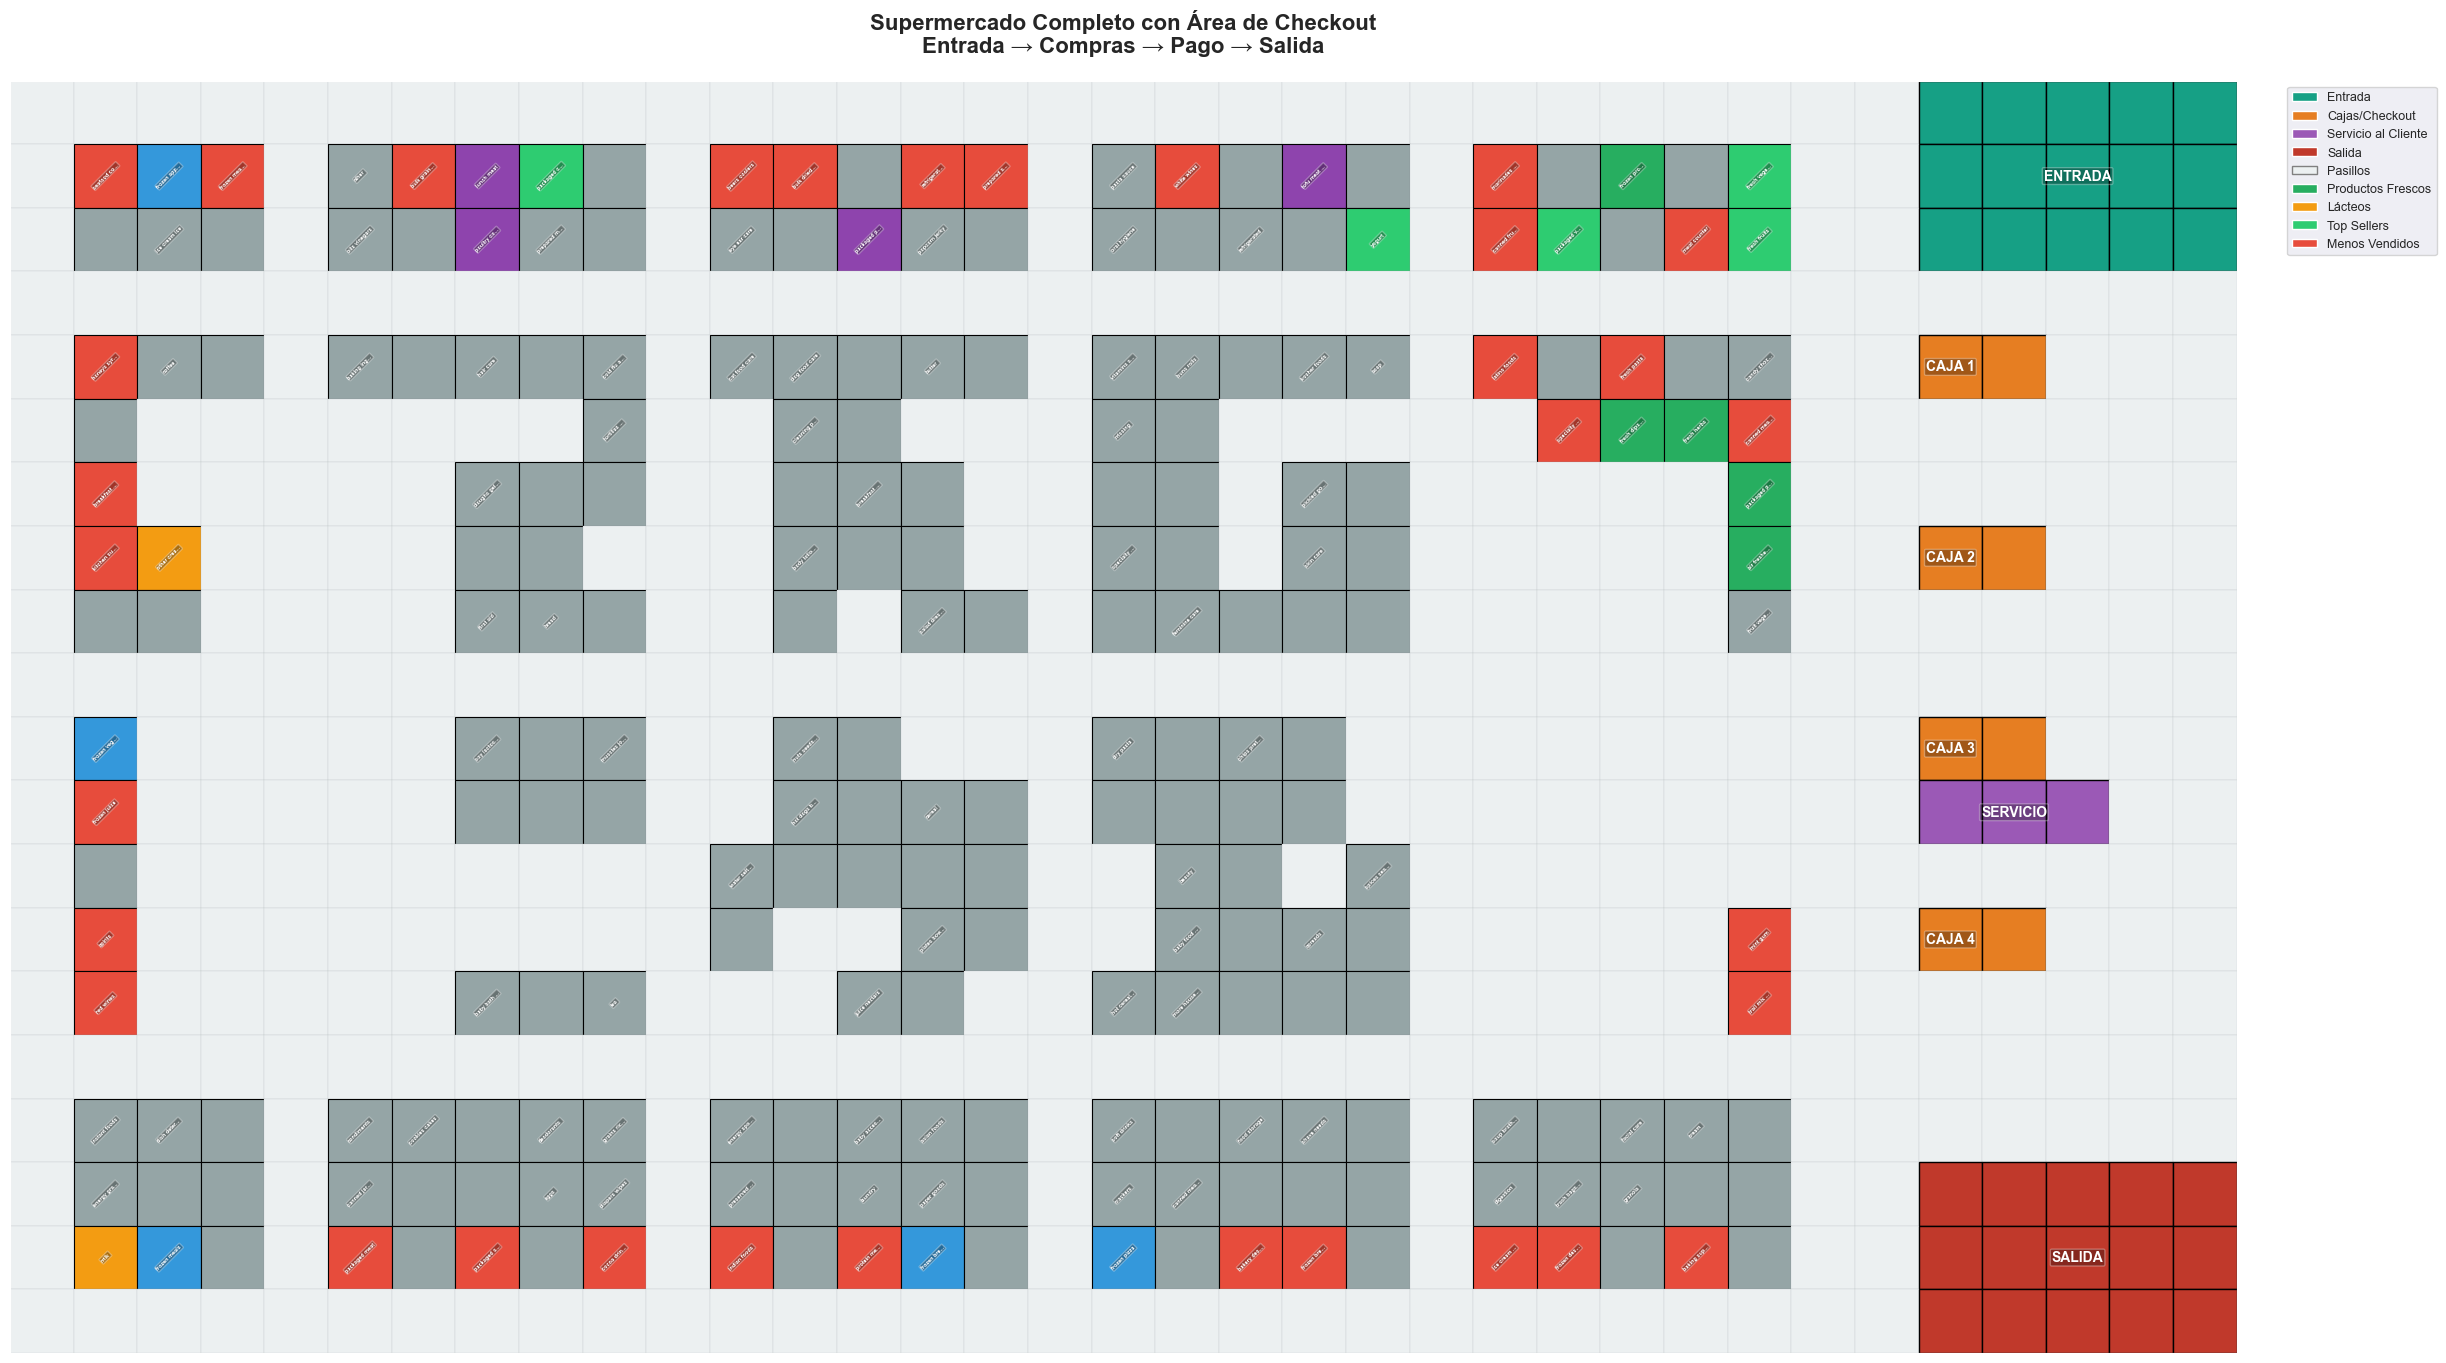


SIMULACIONES COMPLETAS DE EXPERIENCIA DE COMPRAS

--- Simulación Completa 1 ---

EXPERIENCIA COMPLETA DE COMPRAS
Lista de compras: ['fresh fruits', 'yogurt']

ANÁLISIS DE REGLAS DE ASOCIACIÓN:
   • Reglas aplicables encontradas: 9
   • meat counter ↔ fresh fruits (lift: 1.80) - SUGERENCIA
   • canned fruit applesauce ↔ yogurt (lift: 1.76) - SUGERENCIA
   • latino foods ↔ fresh fruits (lift: 1.72) - SUGERENCIA

PROXIMIDADES EN EL LAYOUT:
   💡 Cerca de 'fresh fruits': ['fresh vegetables(d:1)', 'meat counter(d:1)']
   💡 Cerca de 'yogurt': ['canned fruit applesauce(d:2)']

SUGERENCIAS ESTRATÉGICAS (basadas en proximidades del layout):
   REGLA TOP-LESS: latino foods (cerca de fresh fruits, d:6)
   REGLA TOP-LESS: specialty cheeses (cerca de fresh fruits, d:6)
   REGLA TOP-LESS: canned fruit applesauce (cerca de fresh fruits, d:4)

Ruta estratégica generada:
   • Pasillos a visitar: 2
   • Orden optimizado: ['fresh fruits', 'yogurt']
   • Pasos totales: 40

Recorrido completo generado:
   

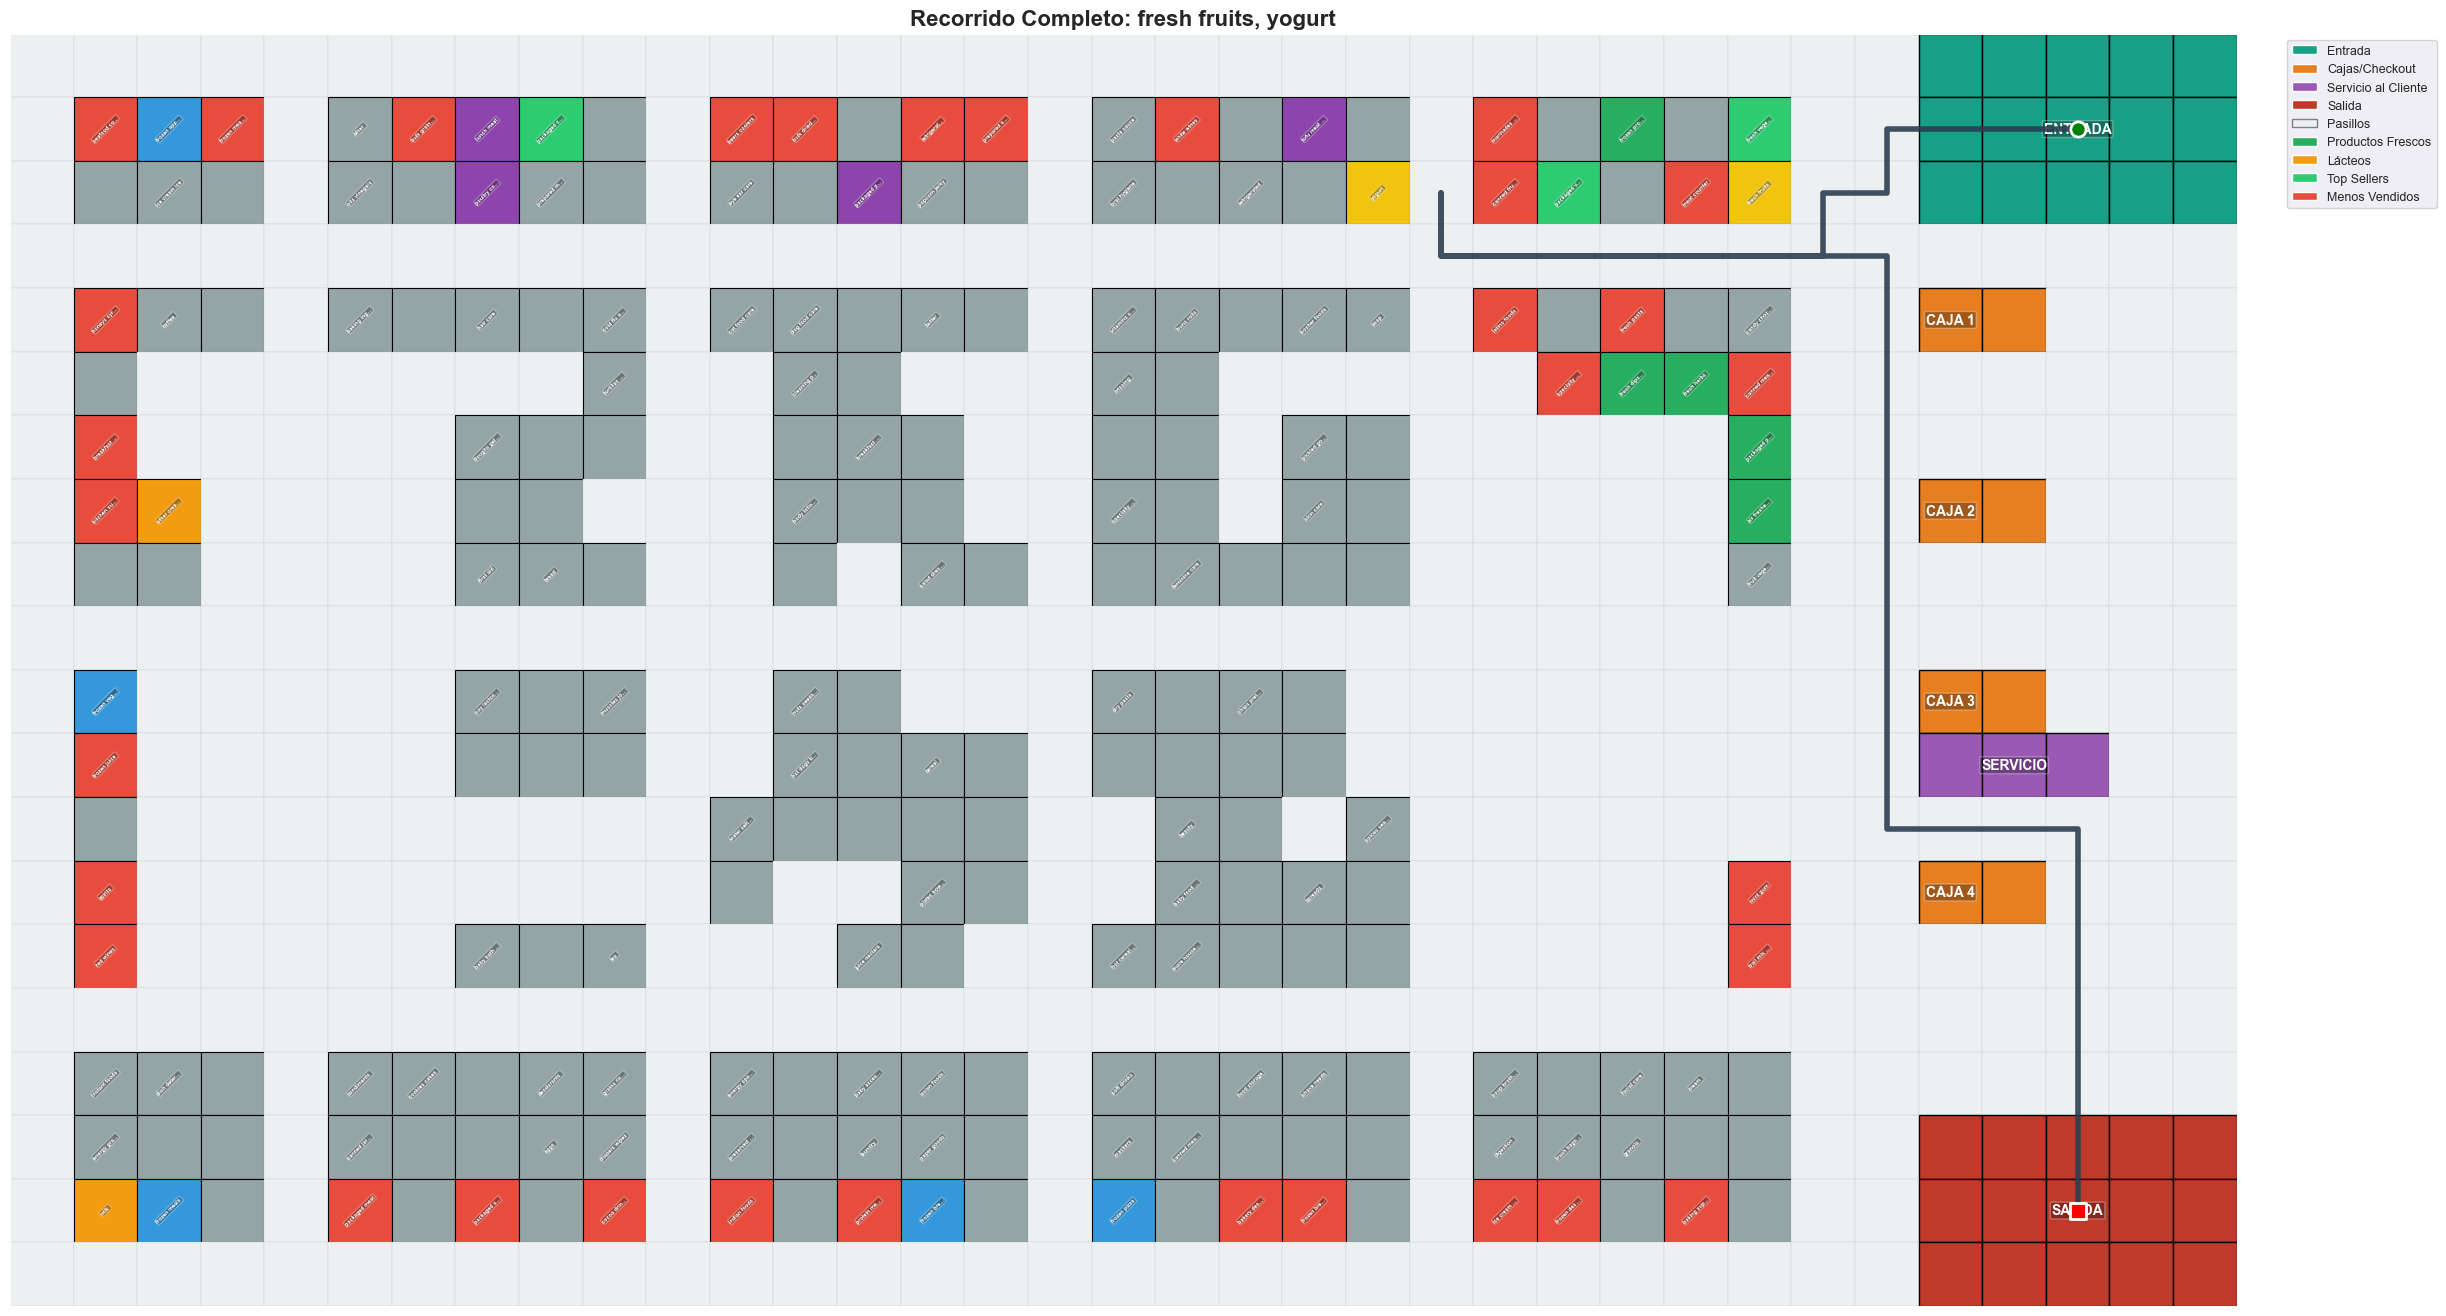


--- Simulación Completa 2 ---

EXPERIENCIA COMPLETA DE COMPRAS
Lista de compras: ['fresh vegetables', 'packaged cheese', 'milk']

ANÁLISIS DE REGLAS DE ASOCIACIÓN:
   • Reglas aplicables encontradas: 13
   • meat counter ↔ fresh vegetables (lift: 1.85) - SUGERENCIA
   • meat counter ↔ fresh vegetables (lift: 1.80) - SUGERENCIA
   • latino foods ↔ fresh vegetables (lift: 1.78) - SUGERENCIA

PROXIMIDADES EN EL LAYOUT:
   💡 Cerca de 'fresh vegetables': ['fresh fruits(d:1)', 'meat counter(d:2)']

SUGERENCIAS ESTRATÉGICAS (basadas en proximidades del layout):
   REGLA TOP-LESS: latino foods (cerca de fresh vegetables, d:7)
   REGLA TOP-LESS: specialty cheeses (cerca de fresh vegetables, d:7)
   REGLA TOP-LESS: canned fruit applesauce (cerca de fresh vegetables, d:5)

Ruta estratégica generada:
   • Pasillos a visitar: 3
   • Orden optimizado: ['fresh vegetables', 'packaged cheese', 'milk']
   • Pasos totales: 84

Recorrido completo generado:
   • Pasos totales: 84
   • Distancia total: 84 

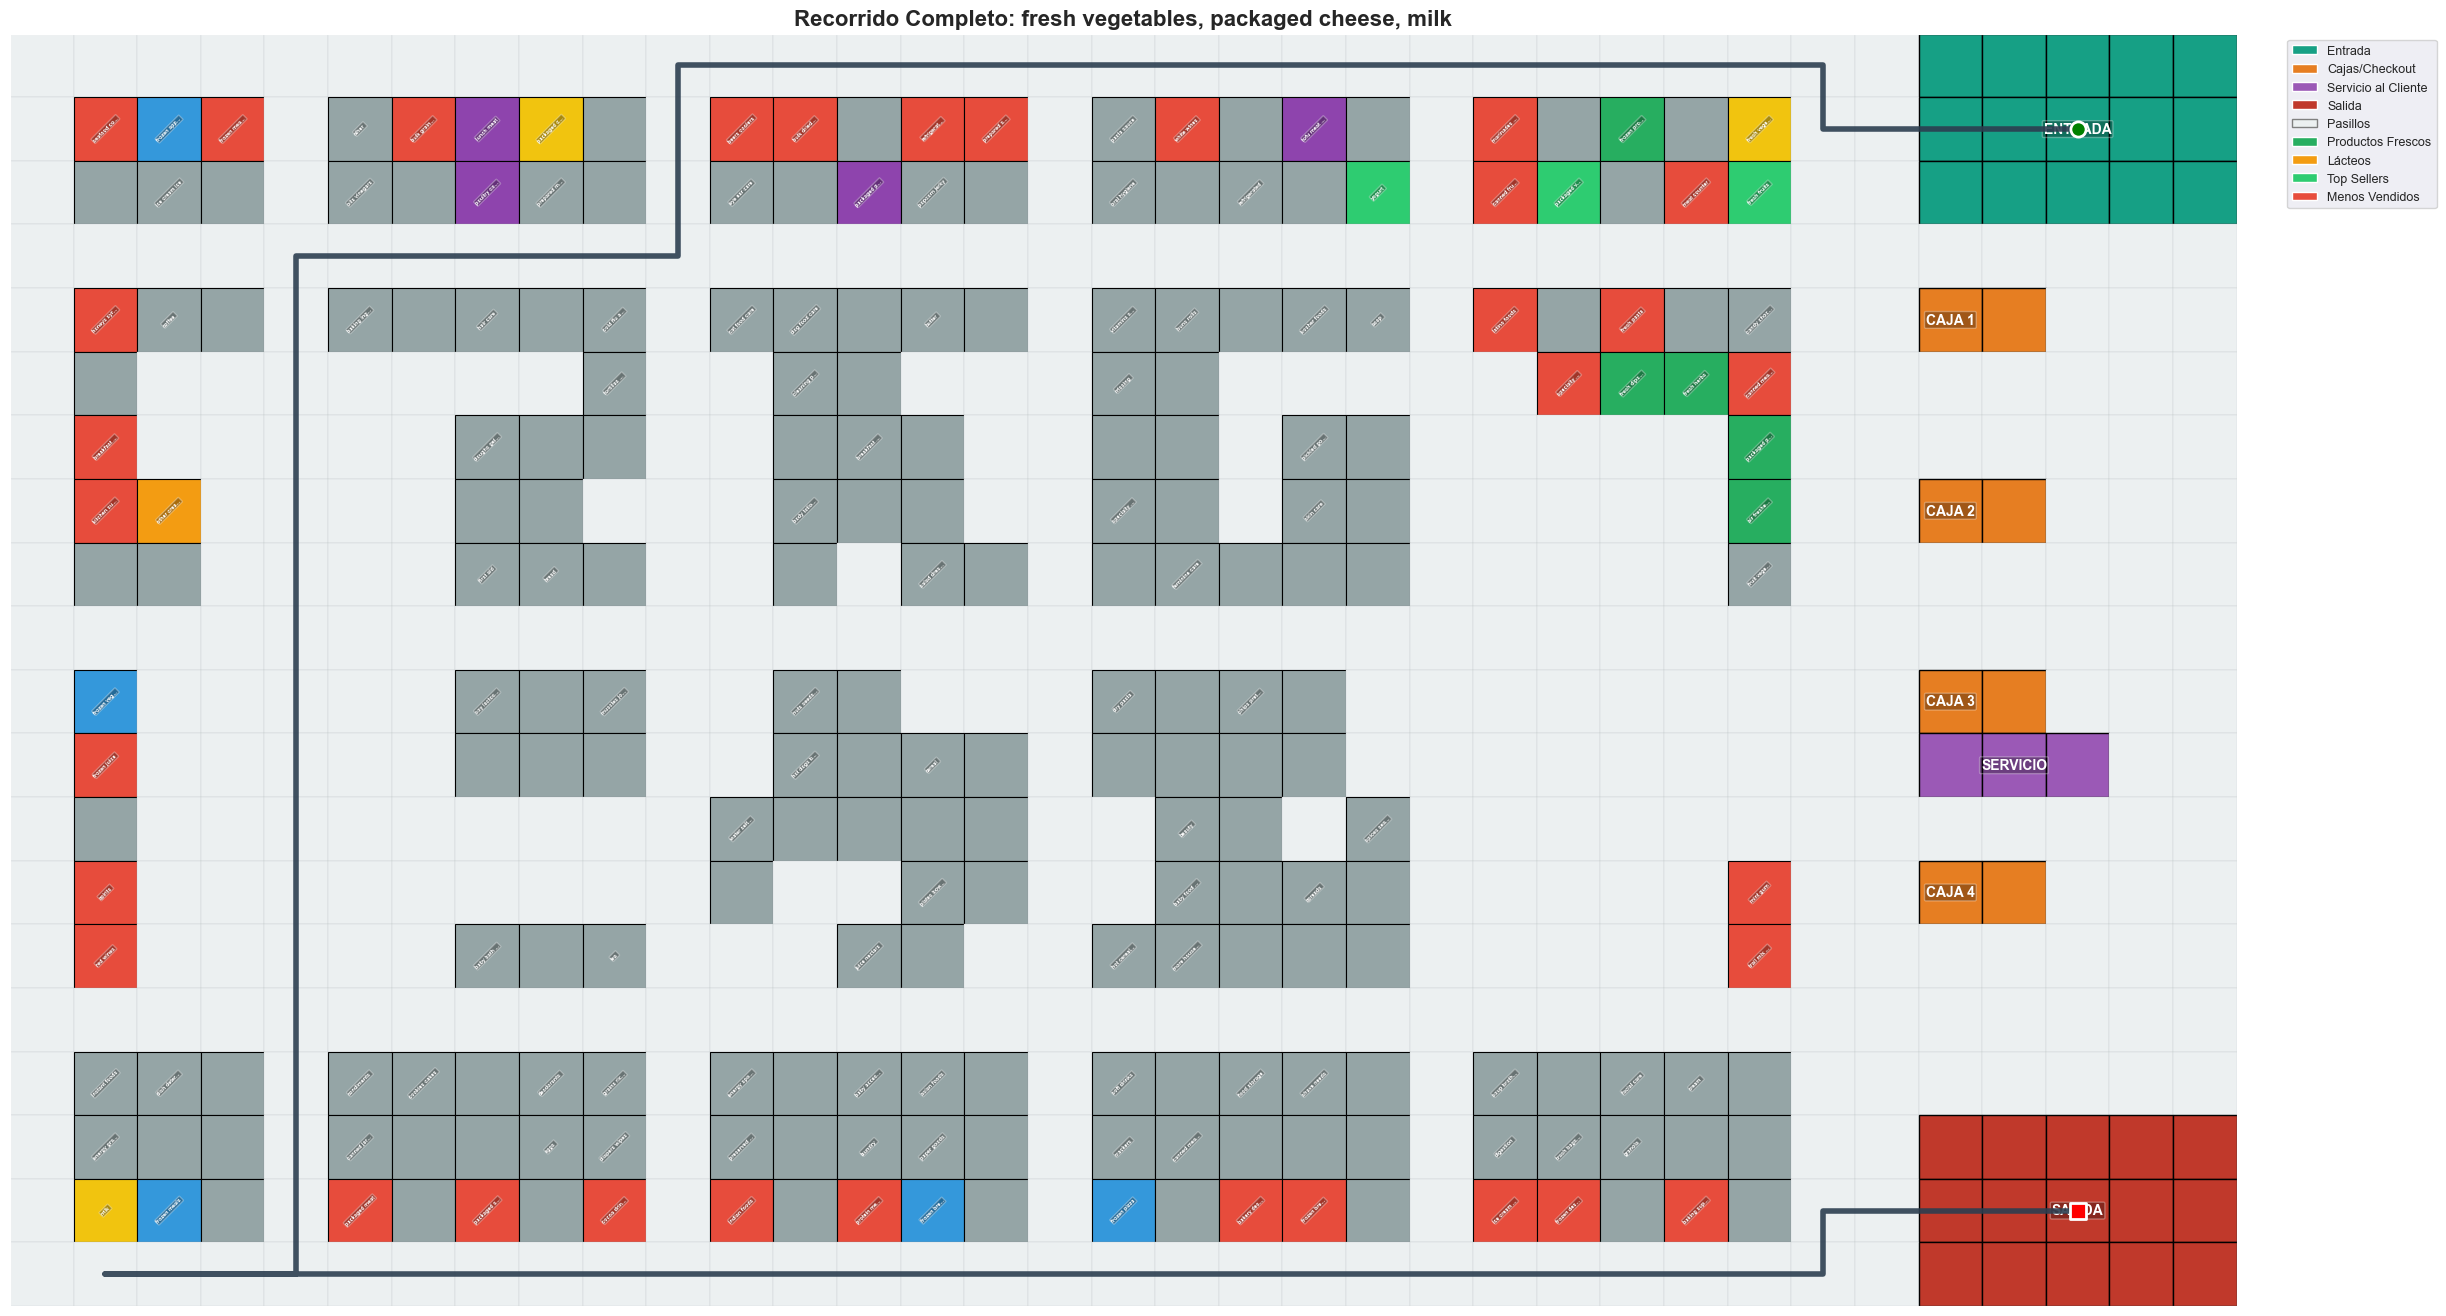


--- Simulación Completa 3 ---

EXPERIENCIA COMPLETA DE COMPRAS
Lista de compras: ['meat counter', 'fresh fruits', 'specialty cheeses']

ANÁLISIS DE REGLAS DE ASOCIACIÓN:
   • Reglas aplicables encontradas: 16
   • meat counter ↔ fresh vegetables (lift: 1.85) - SUGERENCIA
   • meat counter ↔ fresh vegetables (lift: 1.80) - SUGERENCIA
   • meat counter ↔ fresh fruits (lift: 1.80) - EN LISTA

PROXIMIDADES EN EL LAYOUT:
   • 'meat counter' está cerca de ['fresh fruits(d:1)']
   💡 Cerca de 'meat counter': ['fresh vegetables(d:2)', 'packaged vegetables fruits(d:2)']
   • 'fresh fruits' está cerca de ['specialty cheeses(d:6)', 'meat counter(d:1)']
   💡 Cerca de 'fresh fruits': ['fresh vegetables(d:1)', 'canned fruit applesauce(d:4)']
   • 'specialty cheeses' está cerca de ['fresh fruits(d:6)']

SUGERENCIAS ESTRATÉGICAS (basadas en proximidades del layout):
   REGLA TOP-LESS: fresh vegetables (cerca de specialty cheeses, d:7)
   REGLA TOP-LESS: latino foods (cerca de fresh fruits, d:6)
   REG

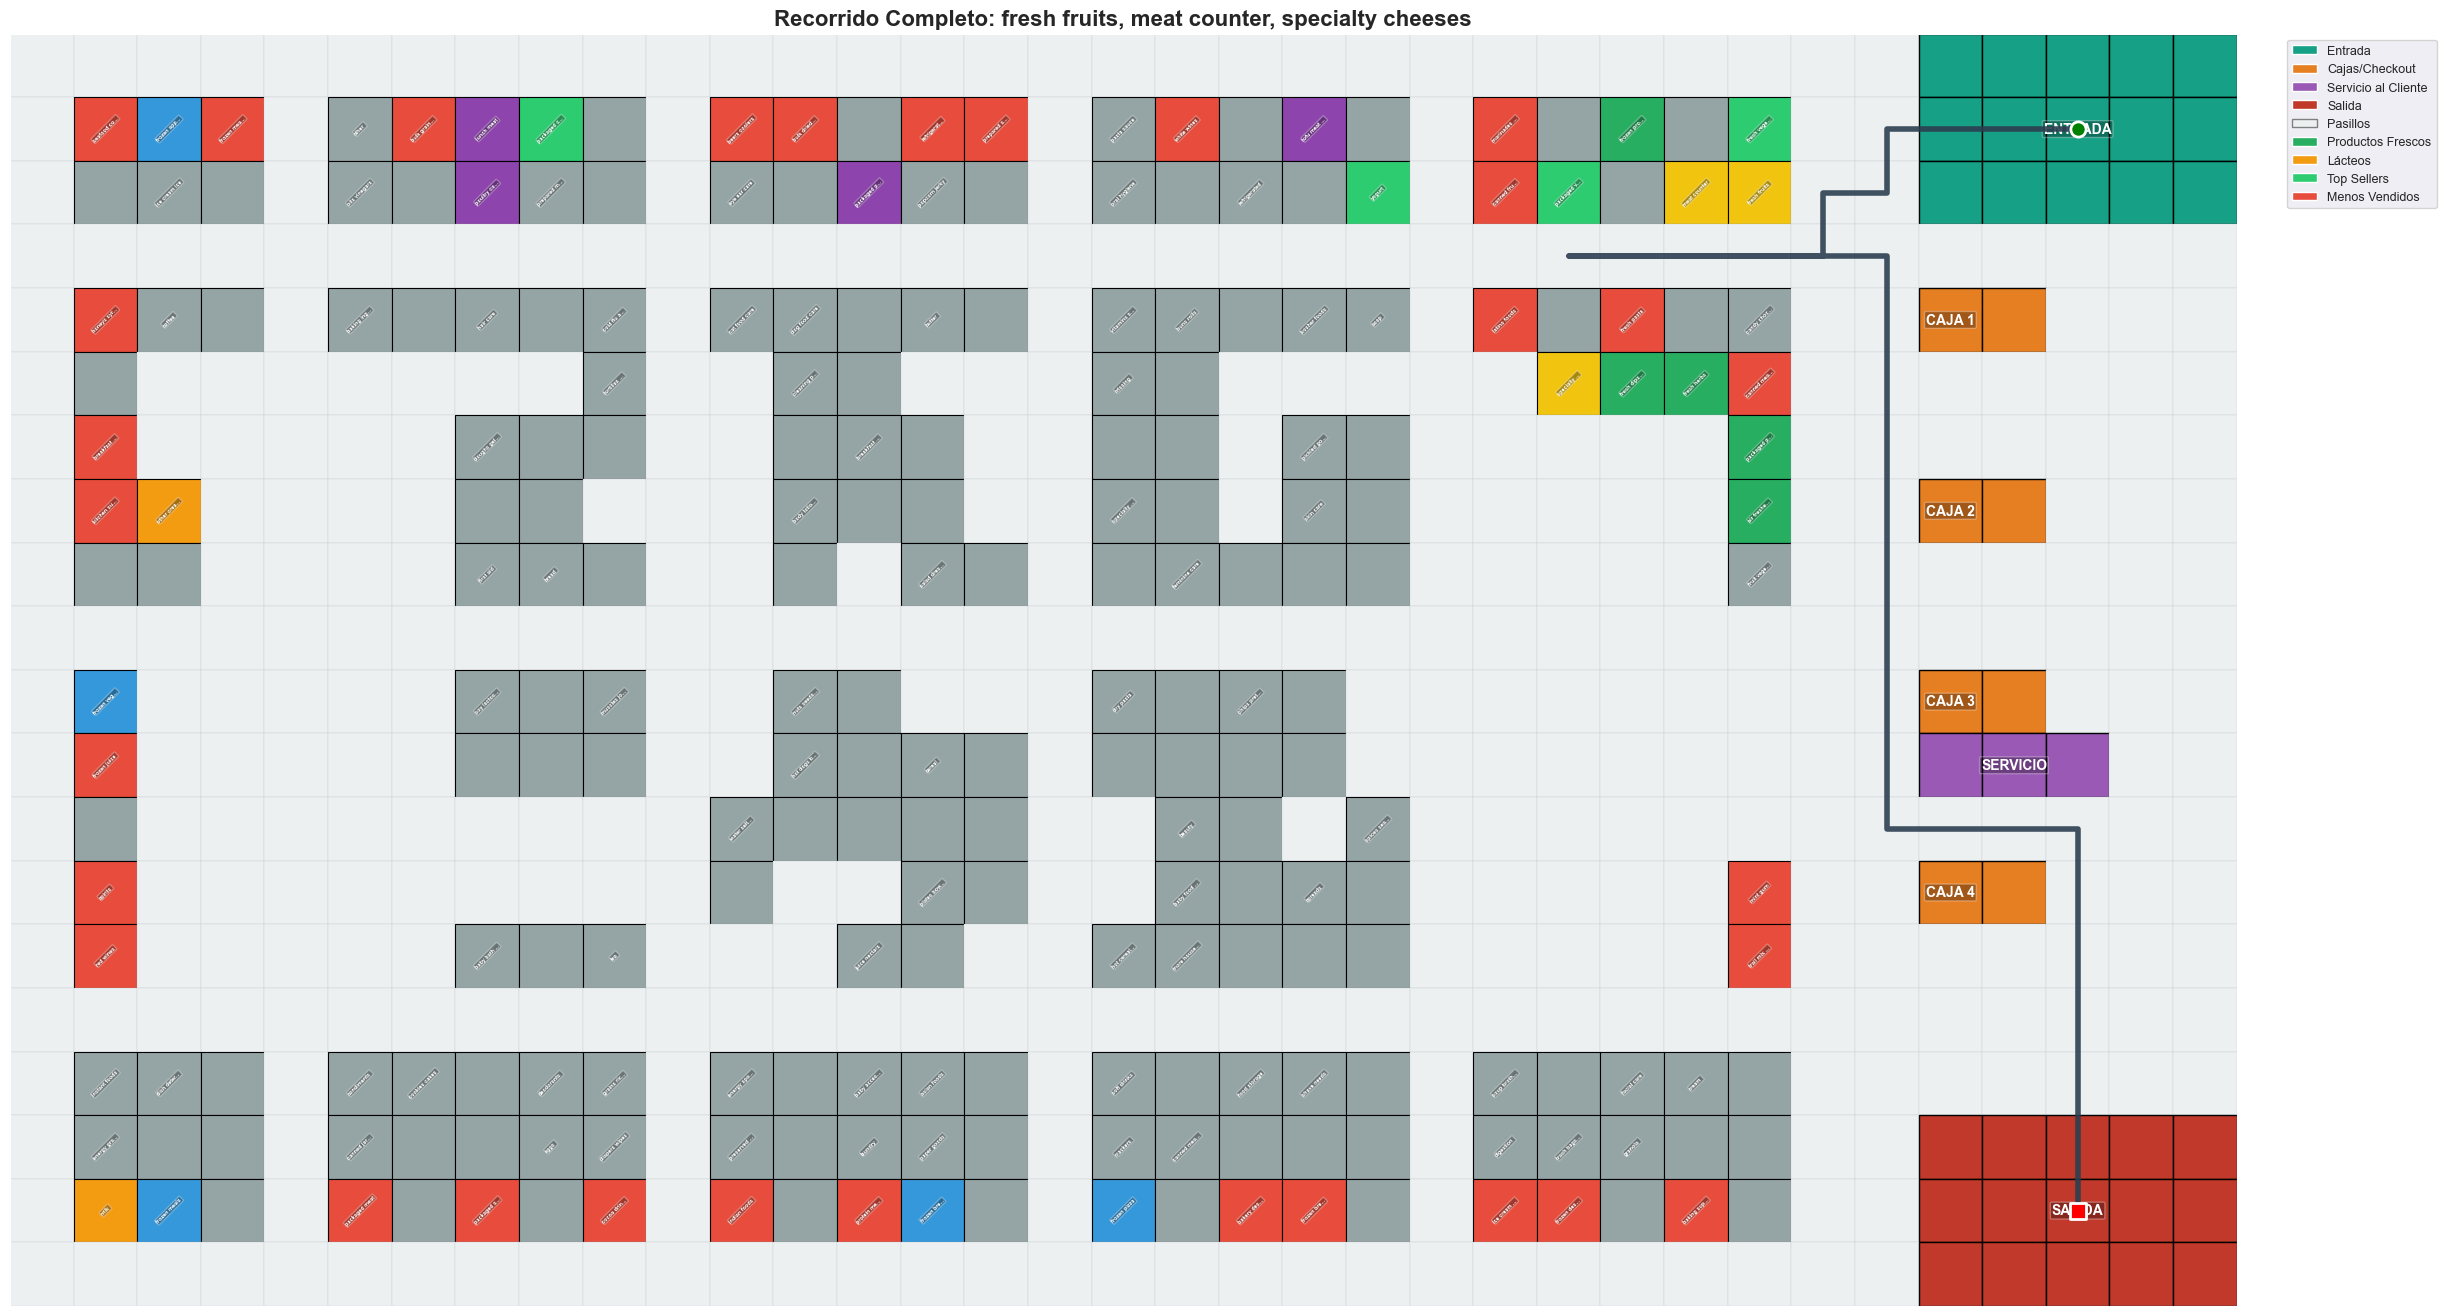


--- Simulación Completa 4 ---

EXPERIENCIA COMPLETA DE COMPRAS
Lista de compras: ['yogurt', 'meat counter', 'fresh vegetables', 'packaged cheese']

ANÁLISIS DE REGLAS DE ASOCIACIÓN:
   • Reglas aplicables encontradas: 17
   • meat counter ↔ fresh vegetables (lift: 1.85) - EN LISTA
   • meat counter ↔ fresh vegetables (lift: 1.80) - EN LISTA
   • meat counter ↔ fresh fruits (lift: 1.80) - SUGERENCIA

PROXIMIDADES EN EL LAYOUT:
   💡 Cerca de 'yogurt': ['canned fruit applesauce(d:2)']
   • 'meat counter' está cerca de ['fresh vegetables(d:2)']
   💡 Cerca de 'meat counter': ['fresh fruits(d:1)', 'packaged vegetables fruits(d:2)']
   • 'fresh vegetables' está cerca de ['meat counter(d:2)']
   💡 Cerca de 'fresh vegetables': ['fresh fruits(d:1)', 'canned meat seafood(d:4)']

SUGERENCIAS ESTRATÉGICAS (basadas en proximidades del layout):
   REGLA TOP-LESS: latino foods (cerca de fresh vegetables, d:7)
   REGLA TOP-LESS: specialty cheeses (cerca de fresh vegetables, d:7)
   REGLA TOP-LESS: can

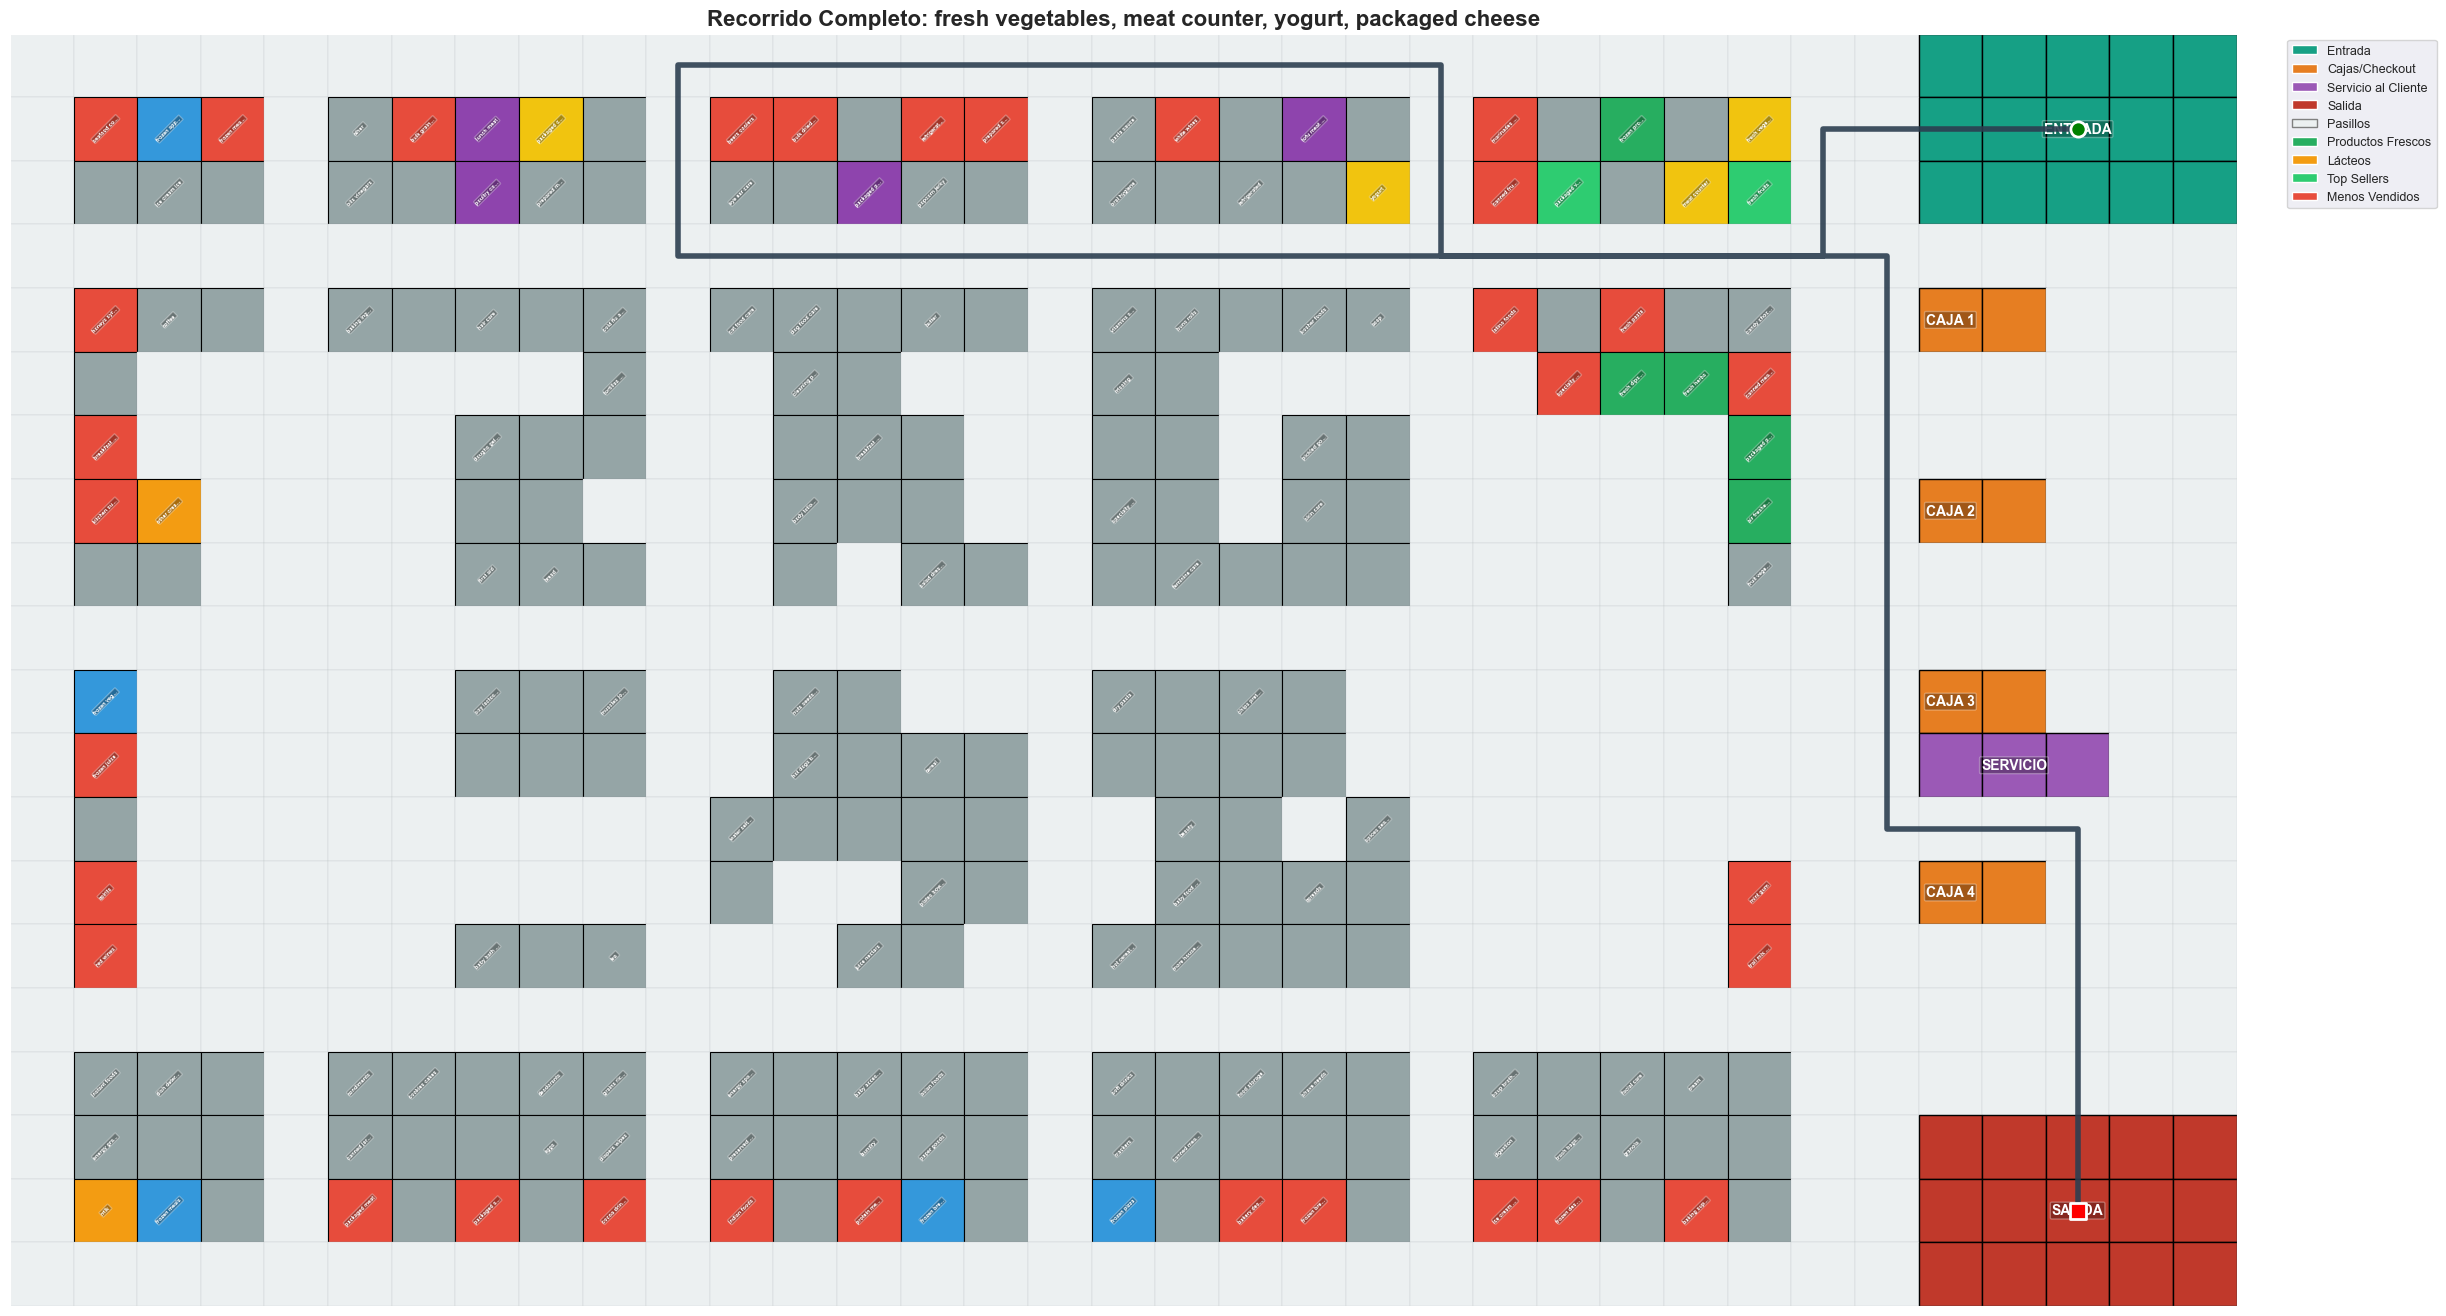


SUPERMERCADO COMPLETO IMPLEMENTADO
Área de entrada: Esquina superior derecha
Múltiples cajas de checkout: Centro derecho
Servicio al cliente: Área central derecha
Área de salida: Esquina inferior derecha
Flujo completo: Entrada → Compras → Pago → Salida
Productos de impulso: Estratégicamente cerca del checkout
Pathfinding completo: Considera todas las áreas
Análisis por fases: Tiempo en cada área del recorrido

Estadísticas del layout:
   • Área total: 700 celdas
   • Área de compras: 659 celdas (94.1%)
   • Área de checkout/servicio: 41 celdas (5.9%)
   • Pasillos asignados: 134
   • Eficiencia de espacio: 20.3% de área de compras utilizada


In [39]:
from matplotlib.patches import Rectangle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

all_aisles = aisles['aisle'].tolist() 

print(f"Total de pasillos en el CSV: {len(all_aisles)}")

# Leer reglas de asociación
reglas_df = pd.read_csv('reglas.csv', header=None)

# Definir pasillos top y menos vendidos
top_aisles = top_aisle_names

less_aisles = less_aisle_names 

# Función para limpiar nombres de pasillos
def clean_aisle_name(aisle_string):
    if pd.isna(aisle_string) or not isinstance(aisle_string, str):
        return []
    return [s.strip() for s in aisle_string.replace('(', '').replace(')', '').replace('"', '').split(',') if s.strip()]

# Extraer reglas de asociación y crear mapa de proximidad
def extract_association_rules():
    """Extraer reglas y crear mapa de proximidad"""
    
    interesting_rules = []
    proximity_map = {}  # {aisle: [aisles_that_should_be_nearby]}
    
    for idx, row in reglas_df.iterrows():
        if len(row) < 8:
            continue
        
        antecedent = clean_aisle_name(str(row[1]))
        consequent = clean_aisle_name(str(row[2]))
        confidence = float(row[4]) if pd.notna(row[4]) else 0
        support = float(row[3]) if pd.notna(row[3]) else 0
        lift = float(row[7]) if pd.notna(row[7]) else 0
        
        # Solo considerar reglas con lift > 1 y confidence > 0.05
        if lift > 1.0 and confidence > 0.05:
            for ant in antecedent:
                for cons in consequent:
                    # Agregar a mapa de proximidad
                    if ant not in proximity_map:
                        proximity_map[ant] = []
                    if cons not in proximity_map:
                        proximity_map[cons] = []
                    
                    proximity_map[ant].append(cons)
                    proximity_map[cons].append(ant)
                    
                    # Si es regla TOP ↔ LESS, es especialmente importante
                    if ((ant in top_aisles and cons in less_aisles) or 
                        (ant in less_aisles and cons in top_aisles)):
                        interesting_rules.append({
                            'antecedent': ant,
                            'consequent': cons,
                            'confidence': confidence,
                            'support': support,
                            'lift': lift,
                            'type': 'TOP→LESS' if ant in top_aisles else 'LESS→TOP'
                        })
    
    # Limpiar duplicados en mapa de proximidad
    for aisle in proximity_map:
        proximity_map[aisle] = list(set(proximity_map[aisle]))
    
    rules_df = pd.DataFrame(interesting_rules)
    best_rules = rules_df.sort_values('lift', ascending=False) if not rules_df.empty else pd.DataFrame()
    
    return best_rules, proximity_map

# Extraer reglas de asociación
best_rules, proximity_map = extract_association_rules()

print(f"Reglas de asociación encontradas: {len(best_rules)}")
print(f"Pasillos con proximidades definidas: {len(proximity_map)}")

# Ejemplo de proximidades
if proximity_map:
    sample_aisle = list(proximity_map.keys())[0]
    print(f"Ejemplo - '{sample_aisle}' debería estar cerca de: {proximity_map[sample_aisle][:3]}")

print("\nREGLAS TOP-LESS MÁS IMPORTANTES:")
if not best_rules.empty:
    for idx, rule in best_rules.head(5).iterrows():
        print(f"   • {rule['antecedent']} ↔ {rule['consequent']} (lift: {rule['lift']:.2f}, conf: {rule['confidence']:.2f})")
else:
    print("   No se encontraron reglas TOP-LESS significativas")

def create_strategic_supermarket_grid_with_checkout():
    """Crear un grid estratégico con área de entrada, salida y cobro en el lado derecho"""
    
    total_aisles = len(all_aisles)
    
    # Grid rectangular más realista (más ancho que alto) con espacio extra para checkout
    grid_width = max(35, int(np.sqrt(total_aisles * 3)) + 5)  # +5 para área de checkout
    grid_height = max(20, int(total_aisles / (grid_width - 5) * 2))  # Ajustar por espacio de checkout
    
    print(f"Creando grid de {grid_height}x{grid_width} para {total_aisles} pasillos + área de checkout")
    
    # Tipos de celdas
    AISLE = 'aisle'
    SECTION = 'section'
    ENTRANCE = 'entrance'
    CHECKOUT = 'checkout'
    EXIT = 'exit'
    CUSTOMER_SERVICE = 'customer_service'
    
    grid = np.full((grid_height, grid_width), '', dtype=object)
    grid_type = np.full((grid_height, grid_width), AISLE, dtype=object)
    aisle_positions = {}
    
    # DEFINIR ÁREA DE CHECKOUT EN EL LADO DERECHO
    checkout_width = 5  # Ancho del área de checkout
    checkout_start_col = grid_width - checkout_width
    
    # 1. CREAR ÁREA DE ENTRADA, SALIDA Y COBRO
    
    # Entrada (esquina superior derecha)
    entrance_rows = 3
    for i in range(entrance_rows):
        for j in range(checkout_start_col, grid_width):
            grid_type[i, j] = ENTRANCE
            if i == 1 and j == checkout_start_col + 2:
                grid[i, j] = "ENTRADA"
    
    # Área de cajas (centro derecho)
    checkout_start_row = entrance_rows + 1
    checkout_end_row = grid_height - 4
    
    # Crear filas de cajas
    num_checkout_rows = (checkout_end_row - checkout_start_row) // 3
    for checkout_row in range(num_checkout_rows):
        row_start = checkout_start_row + checkout_row * 3
        
        # Caja registradora
        for j in range(checkout_start_col, checkout_start_col + 2):
            grid_type[row_start, j] = CHECKOUT
            if j == checkout_start_col:
                grid[row_start, j] = f"CAJA {checkout_row + 1}"
        
        # Pasillo para clientes
        for j in range(checkout_start_col + 2, grid_width):
            grid_type[row_start, j] = AISLE
        
        # Espacio entre cajas
        for j in range(checkout_start_col, grid_width):
            if row_start + 1 < checkout_end_row:
                grid_type[row_start + 1, j] = AISLE
    
    # Servicio al cliente (parte media derecha)
    service_row = (checkout_start_row + checkout_end_row) // 2
    for j in range(checkout_start_col, checkout_start_col + 3):
        grid_type[service_row + 1, j] = CUSTOMER_SERVICE
        if j == checkout_start_col + 1:
            grid[service_row + 1, j] = "SERVICIO"
    
    # Salida (esquina inferior derecha)
    exit_rows = 3
    for i in range(grid_height - exit_rows, grid_height):
        for j in range(checkout_start_col, grid_width):
            grid_type[i, j] = EXIT
            if i == grid_height - 2 and j == checkout_start_col + 2:
                grid[i, j] = "SALIDA"
    
    # 2. CREAR PASILLOS DE TRÁNSITO EN EL ÁREA DE COMPRAS
    
    # Pasillo perimetral solo en área de compras
    shopping_width = checkout_start_col - 1
    
    for i in range(grid_height):
        grid_type[i, 0] = AISLE  # Izquierdo
        if i < entrance_rows or i >= grid_height - exit_rows:
            grid_type[i, shopping_width] = AISLE  # Derecho (solo donde no hay checkout)
    
    for j in range(shopping_width + 1):
        grid_type[0, j] = AISLE  # Superior
        grid_type[grid_height-1, j] = AISLE  # Inferior
    
    # Pasillo principal conectando con checkout
    main_aisle_to_checkout = shopping_width
    for i in range(grid_height):
        grid_type[i, main_aisle_to_checkout] = AISLE
    
    # Pasillos principales en área de compras
    main_aisle_spacing = 6
    
    # Pasillos horizontales
    for row in range(3, grid_height-3, main_aisle_spacing):
        for col in range(1, shopping_width):
            grid_type[row, col] = AISLE
    
    # Pasillos verticales  
    for col in range(4, shopping_width-1, main_aisle_spacing):
        for row in range(1, grid_height-1):
            grid_type[row, col] = AISLE
    
    # 3. IDENTIFICAR ZONAS DISPONIBLES EN ÁREA DE COMPRAS
    
    def get_available_zones():
        """Identificar zonas para colocar secciones solo en área de compras"""
        zones = {
            'perimeter': [],
            'front': [],
            'back': [],
            'center': [],
            'side_left': [],
            'near_checkout': []  # Nueva zona cerca del checkout
        }
        
        for i in range(1, grid_height-1):
            for j in range(1, shopping_width):  # Solo área de compras
                if grid_type[i, j] == AISLE:
                    is_main_aisle = (i % main_aisle_spacing == 3 or 
                                   j % main_aisle_spacing == 4 or
                                   j == main_aisle_to_checkout)
                    
                    if not is_main_aisle:
                        # Clasificar zona
                        if i == 1 or i == grid_height-2 or j == 1:
                            zones['perimeter'].append((i, j))
                        elif i <= 4:
                            zones['front'].append((i, j))
                        elif i >= grid_height-5:
                            zones['back'].append((i, j))
                        elif j <= 6:
                            zones['side_left'].append((i, j))
                        elif j >= shopping_width - 6:  # Cerca del checkout
                            zones['near_checkout'].append((i, j))
                        else:
                            zones['center'].append((i, j))
        
        return zones
    
    zones = get_available_zones()
    
    print("Zonas disponibles en área de compras:")
    for zone_name, positions in zones.items():
        print(f"  {zone_name}: {len(positions)} posiciones")
    
    # 4. FUNCIÓN DE CREACIÓN DE BLOQUES (misma que antes)
    def create_zone_blocks(zone_positions, block_types=None):
        """Crear bloques variados en una zona"""
        if block_types is None:
            block_types = ['individual', '2x1_h', '2x1_v', '2x2', 'L_shape']
        blocks = []
        used_positions = set()
        
        import random
        positions = zone_positions.copy()
        random.shuffle(positions)
        
        for i, j in positions:
            if (i, j) in used_positions:
                continue
            
            for block_type in block_types:
                block = None
                
                if block_type == '2x2':
                    if (i+1 < grid_height-1 and j+1 < shopping_width and
                        all((ni, nj) in positions and (ni, nj) not in used_positions
                            for ni, nj in [(i, j), (i+1, j), (i, j+1), (i+1, j+1)])):
                        block = [(i, j), (i+1, j), (i, j+1), (i+1, j+1)]
                
                elif block_type == '2x1_h':
                    if (j+1 < shopping_width and
                        (i, j+1) in positions and (i, j+1) not in used_positions):
                        block = [(i, j), (i, j+1)]
                
                elif block_type == '2x1_v':
                    if (i+1 < grid_height-1 and
                        (i+1, j) in positions and (i+1, j) not in used_positions):
                        block = [(i, j), (i+1, j)]
                
                elif block_type == 'L_shape':
                    if (i+1 < grid_height-1 and j+1 < shopping_width and
                        all((ni, nj) in positions and (ni, nj) not in used_positions
                            for ni, nj in [(i, j), (i+1, j), (i, j+1)])):
                        block = [(i, j), (i+1, j), (i, j+1)]
                
                elif block_type == 'individual':
                    block = [(i, j)]
                
                if block:
                    blocks.append(block)
                    used_positions.update(block)
                    break
        
        return blocks
    
    # Crear bloques en cada zona
    all_blocks = []
    zone_blocks = {}
    
    for zone_name, positions in zones.items():
        if positions:
            if zone_name == 'perimeter':
                blocks = create_zone_blocks(positions, ['2x1_h', '2x1_v', 'individual'])
            elif zone_name in ['front', 'back']:
                blocks = create_zone_blocks(positions, ['2x2', '2x1_h', 'individual'])
            elif zone_name == 'near_checkout':
                # Productos de impulso cerca del checkout
                blocks = create_zone_blocks(positions, ['individual', '2x1_h'])
            else:
                blocks = create_zone_blocks(positions, ['2x2', 'L_shape', '2x1_h', '2x1_v', 'individual'])
            
            zone_blocks[zone_name] = blocks
            all_blocks.extend(blocks)
    
    print(f"Bloques totales creados en área de compras: {len(all_blocks)}")
    
    # 5. ASIGNACIÓN ESTRATÉGICA BASADA EN REGLAS DE ASOCIACIÓN
    def calculate_association_score(aisle, block, aisle_positions, proximity_map):
        """Calcular puntuación basada en reglas de asociación"""
        
        if aisle not in proximity_map:
            return 0
        
        score = 0
        block_center = (np.mean([pos[0] for pos in block]), 
                       np.mean([pos[1] for pos in block]))
        
        # Evaluar proximidad con cada pasillo relacionado
        for related_aisle in proximity_map[aisle]:
            if related_aisle in aisle_positions:
                related_pos = aisle_positions[related_aisle]
                distance = abs(block_center[0] - related_pos[0]) + abs(block_center[1] - related_pos[1])
                
                # Puntuación base por proximidad (más cerca = mejor)
                proximity_score = max(0, 25 - distance * 2)
                
                # Multiplicadores según tipo de regla
                multiplier = 1.0
                
                # REGLA TOP-LESS: Máxima prioridad
                if ((aisle in top_aisles and related_aisle in less_aisles) or
                    (aisle in less_aisles and related_aisle in top_aisles)):
                    multiplier = 3.0
                    
                # REGLA TOP-TOP: Alta prioridad
                elif aisle in top_aisles and related_aisle in top_aisles:
                    multiplier = 2.5
                    
                # REGLA LESS-LESS: Prioridad media
                elif aisle in less_aisles and related_aisle in less_aisles:
                    multiplier = 1.5
                
                # Buscar regla específica para ajustar multiplicador
                if not best_rules.empty:
                    specific_rule = best_rules[
                        ((best_rules['antecedent'] == aisle) & (best_rules['consequent'] == related_aisle)) |
                        ((best_rules['antecedent'] == related_aisle) & (best_rules['consequent'] == aisle))
                    ]
                    
                    if not specific_rule.empty:
                        rule = specific_rule.iloc[0]
                        # Ajustar multiplicador según lift y confidence
                        lift_bonus = min(2.0, rule['lift'] / 2.0)
                        conf_bonus = min(1.5, rule['confidence'] * 3)
                        multiplier *= (lift_bonus + conf_bonus)
                
                score += proximity_score * multiplier
        
        return score
    
    def find_best_position_for_aisle(aisle, available_blocks, placed_aisles, aisle_positions):
        """Encontrar la mejor posición considerando reglas de asociación"""
        
        if not available_blocks:
            return 0, None
        
        best_score = -1
        best_block = None
        
        for block in available_blocks:
            score = 0
            block_center = (np.mean([pos[0] for pos in block]), 
                          np.mean([pos[1] for pos in block]))
            
            # 1. PUNTUACIÓN POR REGLAS DE ASOCIACIÓN
            association_score = calculate_association_score(aisle, block, aisle_positions, proximity_map)
            score += association_score
            
            # 2. BONIFICACIONES ESPECIALES
            
            # Productos de impulso cerca del checkout
            if any(keyword in aisle.lower() for keyword in ['candy', 'gum', 'magazine', 'snack', 'mint']):
                distance_to_checkout = abs(block_center[1] - checkout_start_col)
                checkout_bonus = max(0, 20 - distance_to_checkout)
                score += checkout_bonus
            
            # Productos frescos cerca de entrada (para frescura percibida)
            if any(keyword in aisle.lower() for keyword in ['fresh', 'produce']):
                distance_to_entrance = abs(block_center[0] - 1) + abs(block_center[1] - checkout_start_col)
                freshness_bonus = max(0, 15 - distance_to_entrance * 0.5)
                score += freshness_bonus
            
            # Productos congelados/refrigerados en perímetro (para eficiencia energética)
            if any(keyword in aisle.lower() for keyword in ['frozen', 'dairy', 'milk', 'yogurt', 'cheese']):
                # Bonificar posiciones perimetrales
                is_perimeter = (block_center[0] <= 2 or block_center[0] >= grid_height-3 or 
                               block_center[1] <= 2 or block_center[1] >= shopping_width-2)
                if is_perimeter:
                    score += 10
            
            # 3. PENALIZACIONES
            
            # Penalizar distancia excesiva entre productos relacionados
            if aisle in proximity_map:
                max_distance_penalty = 0
                for related in proximity_map[aisle]:
                    if related in aisle_positions:
                        related_pos = aisle_positions[related]
                        distance = abs(block_center[0] - related_pos[0]) + abs(block_center[1] - related_pos[1])
                        if distance > 15:  # Distancia considerada "muy lejos"
                            penalty = (distance - 15) * 2
                            max_distance_penalty = max(max_distance_penalty, penalty)
                score -= max_distance_penalty
            
            # 4. EVALUACIÓN FINAL
            if score > best_score:
                best_score = score
                best_block = block
        
        return best_score, best_block
    
    # Ordenar pasillos por prioridad estratégica con reglas de asociación
    def get_aisle_priority_with_associations(aisle):
        priority = 0
        
        # 1. PRIORIDAD POR REGLAS DE ASOCIACIÓN
        association_priority = 0
        
        if aisle in proximity_map:
            # Bonificar pasillos con muchas asociaciones
            association_priority += len(proximity_map[aisle]) * 15
            
            # Bonificar especialmente si tiene reglas TOP-LESS
            for related in proximity_map[aisle]:
                if ((aisle in top_aisles and related in less_aisles) or
                    (aisle in less_aisles and related in top_aisles)):
                    association_priority += 100
        
        # Buscar reglas específicas en best_rules
        if not best_rules.empty:
            aisle_rules = best_rules[
                (best_rules['antecedent'] == aisle) | (best_rules['consequent'] == aisle)
            ]
            
            for _, rule in aisle_rules.iterrows():
                # Prioridad basada en lift y confidence
                rule_priority = rule['lift'] * rule['confidence'] * 50
                association_priority += rule_priority
        
        priority += association_priority
        
        # 2. PRIORIDADES TRADICIONALES
        
        # Productos de impulso cerca del checkout
        if any(keyword in aisle.lower() for keyword in ['candy', 'gum', 'magazine', 'mints']):
            priority += 1200
        
        # Productos frescos tienen máxima prioridad
        elif any(keyword in aisle.lower() for keyword in ['fresh', 'produce']):
            priority += 1000
        
        # Top aisles tienen alta prioridad
        elif aisle in top_aisles:
            priority += 800
        
        # Less aisles tienen prioridad media (pero pueden subir por asociaciones)
        elif aisle in less_aisles:
            priority += 400
        
        # Productos especiales en perímetro
        if any(keyword in aisle.lower() for keyword in ['dairy', 'milk', 'frozen', 'meat']):
            priority += 500
        
        return priority
    
    prioritized_aisles = sorted(all_aisles, key=get_aisle_priority_with_associations, reverse=True)
    
    print(f"\nTOP 10 PASILLOS PRIORIZADOS POR REGLAS:")
    for i, aisle in enumerate(prioritized_aisles[:10], 1):
        priority = get_aisle_priority_with_associations(aisle)
        associations = len(proximity_map.get(aisle, []))
        category = "TOP" if aisle in top_aisles else "LESS" if aisle in less_aisles else "NORMAL"
        print(f"   {i:2d}. {aisle:<35} (prioridad: {priority:4.0f}, asociaciones: {associations:2d}, {category})")
    
    # Asignar pasillos estratégicamente usando reglas de asociación
    available_blocks = all_blocks.copy()
    assignment_log = []
    
    for aisle in prioritized_aisles:
        if not available_blocks:
            break
        
        # Encontrar mejor posición basada en reglas de asociación
        score, best_block = find_best_position_for_aisle(aisle, available_blocks, 
                                                        prioritized_aisles[:prioritized_aisles.index(aisle)], 
                                                        aisle_positions)
        
        if best_block:
            # Asignar pasillo
            pos = best_block[0]  # Usar primera posición para el nombre
            grid[pos] = aisle
            aisle_positions[aisle] = pos
            
            # Marcar todo el bloque como sección
            for pos in best_block:
                grid_type[pos] = SECTION
            
            available_blocks.remove(best_block)
            
            # Log para debugging
            associations = len(proximity_map.get(aisle, []))
            assignment_log.append({
                'aisle': aisle,
                'score': score,
                'associations': associations,
                'position': best_block[0]
            })
    
    # Verificar cobertura
    assigned_aisles = len(aisle_positions)
    total_aisles = len(all_aisles)
    
    print(f"\nPasillos asignados: {assigned_aisles}/{total_aisles} ({assigned_aisles/total_aisles*100:.1f}%)")
    
    # Verificar proximidades logradas usando reglas de asociación
    proximities_achieved = 0
    total_proximities = 0
    top_less_achieved = 0
    total_top_less = 0
    
    for aisle, related_aisles in proximity_map.items():
        if aisle in aisle_positions:
            aisle_pos = aisle_positions[aisle]
            for related in related_aisles:
                if related in aisle_positions:
                    total_proximities += 1
                    related_pos = aisle_positions[related]
                    distance = abs(aisle_pos[0] - related_pos[0]) + abs(aisle_pos[1] - related_pos[1])
                    
                    if distance <= 10:  # Consideramos "cerca" si está a 10 celdas o menos
                        proximities_achieved += 1
                        
                        # Verificar específicamente reglas TOP-LESS
                        if ((aisle in top_aisles and related in less_aisles) or
                            (aisle in less_aisles and related in top_aisles)):
                            top_less_achieved += 1
                    
                    # Contar total de reglas TOP-LESS posibles
                    if ((aisle in top_aisles and related in less_aisles) or
                        (aisle in less_aisles and related in top_aisles)):
                        total_top_less += 1
    
    if total_proximities > 0:
        print(f"Proximidades generales logradas: {proximities_achieved}/{total_proximities} ({proximities_achieved/total_proximities*100:.1f}%)")
    
    if total_top_less > 0:
        print(f"Reglas TOP-LESS logradas: {top_less_achieved}/{total_top_less} ({top_less_achieved/total_top_less*100:.1f}%)")
    
    # Mostrar ejemplos de reglas implementadas exitosamente
    print(f"\nEJEMPLOS DE REGLAS IMPLEMENTADAS:")
    implemented_count = 0
    for aisle, related_aisles in proximity_map.items():
        if aisle in aisle_positions and implemented_count < 5:
            aisle_pos = aisle_positions[aisle]
            for related in related_aisles:
                if related in aisle_positions and implemented_count < 5:
                    related_pos = aisle_positions[related]
                    distance = abs(aisle_pos[0] - related_pos[0]) + abs(aisle_pos[1] - related_pos[1])
                    
                    if distance <= 10:
                        rule_type = "TOP-LESS" if ((aisle in top_aisles and related in less_aisles) or
                                                 (aisle in less_aisles and related in top_aisles)) else "GENERAL"
                        print(f"   • '{aisle}' ↔ '{related}' (distancia: {distance}, tipo: {rule_type})")
                        implemented_count += 1
                        if implemented_count >= 5:
                            break
    
    return grid, grid_type, aisle_positions

# Función de pathfinding actualizada
def find_realistic_path_with_checkout(start_pos, end_pos, grid_type):
    """Encontrar ruta realista incluyendo área de checkout"""
    
    def heuristic(pos1, pos2):
        return abs(pos1[0] - pos2[0]) + abs(pos1[1] - pos2[1])
    
    def get_neighbors(pos, grid_type):
        neighbors = []
        for di, dj in [(-1,0), (1,0), (0,-1), (0,1)]:
            ni, nj = pos[0] + di, pos[1] + dj
            if (0 <= ni < grid_type.shape[0] and 
                0 <= nj < grid_type.shape[1] and 
                grid_type[ni, nj] in ['aisle', 'entrance', 'exit']):  # Permitir entrada y salida
                neighbors.append((ni, nj))
        return neighbors
    
    from heapq import heappush, heappop
    
    open_set = [(0, start_pos)]
    came_from = {}
    g_score = {start_pos: 0}
    f_score = {start_pos: heuristic(start_pos, end_pos)}
    closed_set = set()
    
    while open_set:
        current = heappop(open_set)[1]
        
        if current in closed_set:
            continue
        
        closed_set.add(current)
        
        if current == end_pos:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start_pos)
            return path[::-1]
        
        for neighbor in get_neighbors(current, grid_type):
            if neighbor in closed_set:
                continue
                
            tentative_g = g_score[current] + 1
            
            if neighbor not in g_score or tentative_g < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g
                f_score[neighbor] = tentative_g + heuristic(neighbor, end_pos)
                heappush(open_set, (f_score[neighbor], neighbor))
    
    return []

def find_complete_shopping_journey(shopping_list, aisle_positions, grid_type, grid):
    """Crear recorrido completo: entrada → compras → checkout → salida"""
    
    valid_aisles = [aisle for aisle in shopping_list if aisle in aisle_positions]
    if not valid_aisles:
        return [], []
    
    # Encontrar posiciones clave
    entrance_pos = None
    checkout_pos = None
    exit_pos = None
    
    for i in range(grid_type.shape[0]):
        for j in range(grid_type.shape[1]):
            if grid_type[i, j] == 'entrance' and grid[i, j] == "ENTRADA":
                entrance_pos = (i, j)
            elif grid_type[i, j] == 'checkout' and "CAJA" in grid[i, j]:
                checkout_pos = (i, j)
            elif grid_type[i, j] == 'exit' and grid[i, j] == "SALIDA":
                exit_pos = (i, j)
    
    if not all([entrance_pos, checkout_pos, exit_pos]):
        print("No se encontraron todas las áreas necesarias")
        return [], []
    
    # 1. FASE DE COMPRAS: desde entrada hasta todos los productos
    current_pos = entrance_pos
    full_path = [entrance_pos]
    visit_order = []
    
    # Optimizar orden de visita
    unvisited = valid_aisles.copy()
    
    while unvisited:
        best_aisle = None
        best_distance = float('inf')
        best_access_point = None
        
        for aisle in unvisited:
            target_pos = aisle_positions[aisle]
            
            # Encontrar punto de acceso más cercano
            for di, dj in [(-1,0), (1,0), (0,-1), (0,1), (-2,0), (2,0), (0,-2), (0,2)]:
                ni, nj = target_pos[0] + di, target_pos[1] + dj
                if (0 <= ni < grid_type.shape[0] and 
                    0 <= nj < grid_type.shape[1] and 
                    grid_type[ni, nj] == 'aisle'):
                    
                    dist = abs(current_pos[0] - ni) + abs(current_pos[1] - nj)
                    if dist < best_distance:
                        best_distance = dist
                        best_aisle = aisle
                        best_access_point = (ni, nj)
        
        if best_aisle and best_access_point:
            segment = find_realistic_path_with_checkout(current_pos, best_access_point, grid_type)
            if segment:
                full_path.extend(segment[1:])
                current_pos = best_access_point
                visit_order.append(best_aisle)
                unvisited.remove(best_aisle)
            else:
                break
        else:
            break
    
    # 2. FASE DE CHECKOUT: desde última compra hasta caja
    if current_pos != checkout_pos:
        checkout_segment = find_realistic_path_with_checkout(current_pos, checkout_pos, grid_type)
        if checkout_segment:
            full_path.extend(checkout_segment[1:])
            current_pos = checkout_pos
    
    # 3. FASE DE SALIDA: desde caja hasta salida
    if current_pos != exit_pos:
        exit_segment = find_realistic_path_with_checkout(current_pos, exit_pos, grid_type)
        if exit_segment:
            full_path.extend(exit_segment[1:])
    
    return full_path, visit_order

# Visualización actualizada
def plot_supermarket_with_checkout(grid, grid_type, aisle_positions, shopping_path=None, highlight_aisles=None):
    """Visualizar supermercado con área de checkout"""
    
    grid_height, grid_width = grid.shape
    fig, ax = plt.subplots(figsize=(max(18, grid_width*0.7), max(12, grid_height*0.8)))
    
    # Colores actualizados
    colors = {
        'aisle': '#ecf0f1',
        'section_top': '#2ecc71',
        'section_less': '#e74c3c',
        'section_fresh': '#27ae60',
        'section_frozen': '#3498db',
        'section_dairy': '#f39c12',
        'section_meat': '#8e44ad',
        'section_normal': '#95a5a6',
        'entrance': '#16a085',          # Verde azulado para entrada
        'checkout': '#e67e22',          # Naranja para cajas
        'exit': '#c0392b',              # Rojo para salida
        'customer_service': '#9b59b6',  # Púrpura para servicio
        'path': '#2c3e50',             # Azul oscuro para ruta
        'highlight': '#f1c40f',        # Amarillo para destacados
        'proximity': '#f39c12'         # Naranja para proximidades
    }
    
    # Dibujar celdas
    for i in range(grid_height):
        for j in range(grid_width):
            cell_type = grid_type[i, j]
            aisle = grid[i, j]
            
            # Seleccionar color según tipo de celda
            if cell_type == 'aisle':
                color = colors['aisle']
                edgecolor = '#bdc3c7'
                linewidth = 0.2
            elif cell_type == 'entrance':
                color = colors['entrance']
                edgecolor = 'black'
                linewidth = 1.0
            elif cell_type == 'checkout':
                color = colors['checkout']
                edgecolor = 'black'
                linewidth = 1.0
            elif cell_type == 'exit':
                color = colors['exit']
                edgecolor = 'black'
                linewidth = 1.0
            elif cell_type == 'customer_service':
                color = colors['customer_service']
                edgecolor = 'black'
                linewidth = 1.0
            else:  # section
                if aisle in top_aisles:
                    color = colors['section_top']
                elif aisle in less_aisles:
                    color = colors['section_less']
                elif any(keyword in aisle.lower() for keyword in ['fresh', 'produce']):
                    color = colors['section_fresh']
                elif 'frozen' in aisle.lower():
                    color = colors['section_frozen']
                elif any(keyword in aisle.lower() for keyword in ['milk', 'dairy', 'yogurt', 'cheese']):
                    color = colors['section_dairy']
                elif any(keyword in aisle.lower() for keyword in ['meat', 'poultry', 'seafood']):
                    color = colors['section_meat']
                else:
                    color = colors['section_normal']
                
                edgecolor = 'black'
                linewidth = 0.8
            
            # Resaltar si está en highlight_aisles
            if highlight_aisles and aisle in highlight_aisles:
                color = colors['highlight']
            
            rect = Rectangle((j, grid_height-1-i), 1, 1, 
                           facecolor=color, edgecolor=edgecolor, linewidth=linewidth)
            ax.add_patch(rect)
            
            # Agregar texto para áreas especiales y secciones destacadas
            if aisle and (cell_type in ['entrance', 'checkout', 'exit', 'customer_service'] or
                         (highlight_aisles is None or len(highlight_aisles) <= 5 or aisle in (highlight_aisles or []))):
                
                # Texto más grande para áreas especiales
                if cell_type in ['entrance', 'checkout', 'exit', 'customer_service']:
                    fontsize = 10
                    weight = 'bold'
                    color_text = 'white'
                else:
                    display_name = aisle[:10] + '...' if len(aisle) > 13 else aisle
                    aisle = display_name
                    fontsize = max(4, min(8, 120//grid_width))
                    weight = 'bold'
                    color_text = 'white'
                
                ax.text(j+0.5, grid_height-1-i+0.5, aisle, 
                       ha='center', va='center', fontsize=fontsize, 
                       rotation=45 if cell_type == 'section' else 0, 
                       weight=weight, color=color_text,
                       bbox=dict(boxstyle="round,pad=0.1", facecolor='black', alpha=0.3))
    
    # Dibujar ruta completa
    if shopping_path and len(shopping_path) > 1:
        path_x = [pos[1] + 0.5 for pos in shopping_path]
        path_y = [grid_height - 1 - pos[0] + 0.5 for pos in shopping_path]
        ax.plot(path_x, path_y, color=colors['path'], linewidth=4, alpha=0.9, 
               label='Recorrido Completo', zorder=10)
        
        # Marcar puntos importantes
        ax.scatter(path_x[0], path_y[0], c='green', s=120, marker='o', 
                  label='Entrada', zorder=15, edgecolor='white', linewidth=2)
        ax.scatter(path_x[-1], path_y[-1], c='red', s=120, marker='s', 
                  label='Salida', zorder=15, edgecolor='white', linewidth=2)
        
        # Marcar checkout si está en la ruta
        for i, pos in enumerate(shopping_path):
            if grid_type[pos] == 'checkout':
                ax.scatter(path_x[i], path_y[i], c='orange', s=100, marker='$', 
                          label='Checkout', zorder=15, edgecolor='white', linewidth=1)
                break
    
    ax.set_xlim(0, grid_width)
    ax.set_ylim(0, grid_height)
    ax.set_aspect('equal')
    ax.set_title(f'Supermercado Completo con Área de Checkout\n'
                f'Entrada → Compras → Pago → Salida', 
                fontsize=16, fontweight='bold', pad=20)
    
    # Leyenda actualizada
    legend_elements = [
        plt.Rectangle((0,0),1,1, facecolor=colors['entrance'], label='Entrada'),
        plt.Rectangle((0,0),1,1, facecolor=colors['checkout'], label='Cajas/Checkout'),
        plt.Rectangle((0,0),1,1, facecolor=colors['customer_service'], label='Servicio al Cliente'),
        plt.Rectangle((0,0),1,1, facecolor=colors['exit'], label='Salida'),
        plt.Rectangle((0,0),1,1, facecolor=colors['aisle'], edgecolor='gray', label='Pasillos'),
        plt.Rectangle((0,0),1,1, facecolor=colors['section_fresh'], label='Productos Frescos'),
        plt.Rectangle((0,0),1,1, facecolor=colors['section_dairy'], label='Lácteos'),
        plt.Rectangle((0,0),1,1, facecolor=colors['section_top'], label='Top Sellers'),
        plt.Rectangle((0,0),1,1, facecolor=colors['section_less'], label='Menos Vendidos')
    ]
    
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=9)
    ax.set_xticks([])
    ax.set_yticks([])
    
    plt.tight_layout()
    return fig, ax

# Crear el nuevo grid con checkout
grid, grid_type, aisle_positions = create_strategic_supermarket_grid_with_checkout()

# Mostrar el supermercado completo
fig, ax = plot_supermarket_with_checkout(grid, grid_type, aisle_positions)
plt.show()

# Función de simulación actualizada con análisis de reglas
def simulate_complete_shopping_experience(shopping_list, aisle_positions, grid_type, grid, best_rules, proximity_map, name):
    """Simular experiencia completa de compras con análisis de reglas de asociación"""
    
    print(f"\nEXPERIENCIA COMPLETA DE COMPRAS")
    print("="*60)
    print(f"Lista de compras: {shopping_list}")
    
    # Validar pasillos
    valid_aisles = [aisle for aisle in shopping_list if aisle in aisle_positions]
    invalid_aisles = [aisle for aisle in shopping_list if aisle not in aisle_positions]
    
    if invalid_aisles:
        print(f"Pasillos no encontrados: {invalid_aisles}")
    
    if not valid_aisles:
        print("No se encontraron pasillos válidos")
        return
    
    # Crear recorrido completo
    full_path, visit_order = find_complete_shopping_journey(valid_aisles, aisle_positions, grid_type, grid)
    
    if not full_path:
        print("No se pudo crear una ruta válida")
        return
    
    # ANÁLISIS DE REGLAS DE ASOCIACIÓN EN LA LISTA
    print(f"\nANÁLISIS DE REGLAS DE ASOCIACIÓN:")
    
    # Verificar reglas aplicables a la lista actual
    applicable_rules = []
    if not best_rules.empty:
        for _, rule in best_rules.iterrows():
            if rule['antecedent'] in valid_aisles or rule['consequent'] in valid_aisles:
                applicable_rules.append(rule)
    
    if applicable_rules:
        print(f"   • Reglas aplicables encontradas: {len(applicable_rules)}")
        for rule in applicable_rules[:3]:  # Mostrar top 3
            status = "EN LISTA" if (rule['antecedent'] in valid_aisles and rule['consequent'] in valid_aisles) else "SUGERENCIA"
            print(f"   • {rule['antecedent']} ↔ {rule['consequent']} (lift: {rule['lift']:.2f}) - {status}")
    
    # Análizar proximidades en el layout
    print(f"\nPROXIMIDADES EN EL LAYOUT:")
    proximity_analysis = []
    
    for aisle in valid_aisles:
        if aisle in proximity_map:
            aisle_pos = aisle_positions[aisle]
            nearby_in_list = []
            nearby_suggestions = []
            
            for related in proximity_map[aisle]:
                if related in aisle_positions:
                    related_pos = aisle_positions[related]
                    distance = abs(aisle_pos[0] - related_pos[0]) + abs(aisle_pos[1] - related_pos[1])
                    
                    if distance <= 10:  # Cerca en el layout
                        if related in valid_aisles:
                            nearby_in_list.append((related, distance))
                        else:
                            nearby_suggestions.append((related, distance))
            
            if nearby_in_list:
                proximity_analysis.append(f"   • '{aisle}' está cerca de {[f'{r}(d:{d})' for r, d in nearby_in_list[:2]]}")
            
            if nearby_suggestions:
                top_suggestions = sorted(nearby_suggestions, key=lambda x: x[1])[:2]
                proximity_analysis.append(f"   💡 Cerca de '{aisle}': {[f'{r}(d:{d})' for r, d in top_suggestions]}")
    
    for analysis in proximity_analysis[:5]:  # Mostrar primeras 5
        print(analysis)
    
    # Sugerencias basadas en reglas de asociación
    strategic_suggestions = []
    for aisle in valid_aisles:
        if aisle in proximity_map:
            for related in proximity_map[aisle]:
                if (related in aisle_positions and related not in valid_aisles and 
                    related in [item for item in all_aisles]):  # Verificar que existe
                    
                    aisle_pos = aisle_positions[aisle]
                    related_pos = aisle_positions[related]
                    distance = abs(aisle_pos[0] - related_pos[0]) + abs(aisle_pos[1] - related_pos[1])
                    
                    if distance <= 8:  # Muy cerca
                        # Priorizar reglas TOP-LESS
                        priority = 3 if ((aisle in top_aisles and related in less_aisles) or 
                                       (aisle in less_aisles and related in top_aisles)) else 1
                        
                        strategic_suggestions.append({
                            'from': aisle,
                            'to': related,
                            'distance': distance,
                            'priority': priority
                        })
    
    # Mostrar sugerencias estratégicas
    if strategic_suggestions:
        strategic_suggestions.sort(key=lambda x: (x['priority'], x['distance']), reverse=True)
        print(f"\nSUGERENCIAS ESTRATÉGICAS (basadas en proximidades del layout):")
        for suggestion in strategic_suggestions[:3]:
            priority_text = "REGLA TOP-LESS" if suggestion['priority'] == 3 else "• Asociación"
            print(f"   {priority_text}: {suggestion['to']} (cerca de {suggestion['from']}, d:{suggestion['distance']})")
    
    print(f"\nRuta estratégica generada:")
    print(f"   • Pasillos a visitar: {len(valid_aisles)}")
    print(f"   • Orden optimizado: {visit_order}")
    print(f"   • Pasos totales: {len(full_path)}")
    
    print(f"\nRecorrido completo generado:")
    print(f"   • Pasos totales: {len(full_path)}")
    print(f"   • Distancia total: {len(full_path)} metros")
    
    # Analizar fases del recorrido
    phases = {
        'entrada': 0,
        'compras': 0,
        'checkout': 0,
        'salida': 0
    }
    
    current_phase = 'entrada'
    for pos in full_path:
        cell_type = grid_type[pos]
        if cell_type == 'entrance':
            current_phase = 'entrada'
        elif cell_type in ['aisle', 'section']:
            current_phase = 'compras'
        elif cell_type == 'checkout':
            current_phase = 'checkout'
        elif cell_type == 'exit':
            current_phase = 'salida'
        
        phases[current_phase] += 1
    
    print(f"\nAnálisis por fases:")
    print(f"   • Entrada: {phases['entrada']} pasos")
    print(f"   • Compras: {phases['compras']} pasos ({phases['compras']/len(full_path)*100:.1f}%)")
    print(f"   • Checkout: {phases['checkout']} pasos")
    print(f"   • Salida: {phases['salida']} pasos")
    
    # Sugerencias de productos adicionales cerca del checkout
    checkout_suggestions = []
    for aisle in aisle_positions:
        if any(keyword in aisle.lower() for keyword in ['candy', 'gum', 'mint', 'magazine', 'snack']):
            if aisle not in shopping_list:
                checkout_suggestions.append(aisle)
    
    if checkout_suggestions:
        print(f"\nProductos de impulso disponibles en checkout:")
        for suggestion in checkout_suggestions[:3]:
            print(f"   • {suggestion}")
    
    # Visualizar recorrido completo
    fig, ax = plot_supermarket_with_checkout(grid, grid_type, aisle_positions, 
                                           shopping_path=full_path, 
                                           highlight_aisles=visit_order)
    
    plt.title(f'Recorrido Completo: {", ".join(visit_order[:4])}' + 
              (f' + {len(visit_order)-4} más' if len(visit_order) > 4 else ''), 
              fontsize=16, fontweight='bold')
    plt.savefig(name, dpi=400)
    plt.show()
    
    return full_path

# Ejemplos de simulación completa
print(f"\n{'='*70}")
print("SIMULACIONES COMPLETAS DE EXPERIENCIA DE COMPRAS")
print("="*70)

ejemplos_completos = [
    ['fresh fruits', 'yogurt'],
    ['fresh vegetables', 'packaged cheese', 'milk'],
    ['meat counter', 'fresh fruits', 'specialty cheeses'],
    ['yogurt', 'meat counter', 'fresh vegetables', 'packaged cheese']
]

for i, lista in enumerate(ejemplos_completos, 1):
    print(f"\n--- Simulación Completa {i} ---")
    simulate_complete_shopping_experience(lista, aisle_positions, grid_type, grid, best_rules, proximity_map, f"simulation{i}")

print(f"\n{'='*70}")
print("SUPERMERCADO COMPLETO IMPLEMENTADO")
print("="*70)
print(f"Área de entrada: Esquina superior derecha")
print(f"Múltiples cajas de checkout: Centro derecho")
print(f"Servicio al cliente: Área central derecha")
print(f"Área de salida: Esquina inferior derecha")
print(f"Flujo completo: Entrada → Compras → Pago → Salida")
print(f"Productos de impulso: Estratégicamente cerca del checkout")
print(f"Pathfinding completo: Considera todas las áreas")
print(f"Análisis por fases: Tiempo en cada área del recorrido")

# Mostrar estadísticas finales del layout
checkout_area_size = 0
shopping_area_size = 0
total_cells = grid.shape[0] * grid.shape[1]

for i in range(grid.shape[0]):
    for j in range(grid.shape[1]):
        if grid_type[i, j] in ['entrance', 'checkout', 'exit', 'customer_service']:
            checkout_area_size += 1
        elif grid_type[i, j] in ['aisle', 'section']:
            shopping_area_size += 1

print(f"\nEstadísticas del layout:")
print(f"   • Área total: {total_cells} celdas")
print(f"   • Área de compras: {shopping_area_size} celdas ({shopping_area_size/total_cells*100:.1f}%)")
print(f"   • Área de checkout/servicio: {checkout_area_size} celdas ({checkout_area_size/total_cells*100:.1f}%)")
print(f"   • Pasillos asignados: {len(aisle_positions)}")
print(f"   • Eficiencia de espacio: {len(aisle_positions)/shopping_area_size*100:.1f}% de área de compras utilizada") 